# LOCA Precip Compare: Dry Days

Compare the dry day spell length distributions and samples among the four analysis periods for LOCA archive.

The purpose of this notebook is purely to compare the datasets.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats

Parameters, primarily input file names

In [3]:
DP_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rech' \
        r'arge\Data\JNotes\Processed\CMIP5\DryDays_1981-2010.pickle'
P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rech' \
        r'arge\Data\JNotes\Processed\CMIP5\DryDays_LOCA_2011-2040.pickle'
P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rech' \
        r'arge\Data\JNotes\Processed\CMIP5\DryDays_LOCA_2041-2070.pickle'
P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rech' \
        r'arge\Data\JNotes\Processed\CMIP5\DryDays_LOCA_2071-2100.pickle'

In [4]:
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\Precip_Compare_1981-2010'

In [5]:
LOCA_GRID_END = 168       # the last LOCA grid cell

## Load Files

### Load and Reduce DataFrames

In [6]:
CmipDF = pd.read_pickle( DP_IN )

Need to split CMIP5 data by grid id and then by month.

In [7]:
ExGridID = lambda MID: int( MID.split("_")[1] )

In [8]:
CmipDF["Grid_Id"] = CmipDF.apply( lambda row: ExGridID(row["MGrid_Id"]), axis=1 )

In [9]:
Test1 = CmipDF[CmipDF["Grid_Id"] == 92].copy()

In [10]:
UniqMods = sorted( Test1["MGrid_Id"].unique() )
len(UniqMods)

64

In [11]:
JanD1DF = CmipDF[(CmipDF["Month"] == 1) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
FebD1DF = CmipDF[(CmipDF["Month"] == 2) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
MarD1DF = CmipDF[(CmipDF["Month"] == 3) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
AprD1DF = CmipDF[(CmipDF["Month"] == 4) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
MayD1DF = CmipDF[(CmipDF["Month"] == 5) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
JunD1DF = CmipDF[(CmipDF["Month"] == 6) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
JulD1DF = CmipDF[(CmipDF["Month"] == 7) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
AugD1DF = CmipDF[(CmipDF["Month"] == 8) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
SepD1DF = CmipDF[(CmipDF["Month"] == 9) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
OctD1DF = CmipDF[(CmipDF["Month"] == 10) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
NovD1DF = CmipDF[(CmipDF["Month"] == 11) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
DecD1DF = CmipDF[(CmipDF["Month"] == 12) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()

In [12]:
del CmipDF

Now load the other periods. They are already parsed to be just the LOCA grid

In [13]:
CmipDF = pd.read_pickle( P1_IN )

In [14]:
CmipDF["Grid_Id"] = CmipDF.apply( lambda row: ExGridID(row["MGrid_Id"]), axis=1 )

In [15]:
Test1 = CmipDF[CmipDF["Grid_Id"] == 92].copy()

In [16]:
UniqMods = sorted( Test1["MGrid_Id"].unique() )
len(UniqMods)

64

In [17]:
JanP1DF = CmipDF[(CmipDF["Month"] == 1)].copy()
FebP1DF = CmipDF[(CmipDF["Month"] == 2)].copy()
MarP1DF = CmipDF[(CmipDF["Month"] == 3)].copy()
AprP1DF = CmipDF[(CmipDF["Month"] == 4)].copy()
MayP1DF = CmipDF[(CmipDF["Month"] == 5)].copy()
JunP1DF = CmipDF[(CmipDF["Month"] == 6)].copy()
JulP1DF = CmipDF[(CmipDF["Month"] == 7)].copy()
AugP1DF = CmipDF[(CmipDF["Month"] == 8)].copy()
SepP1DF = CmipDF[(CmipDF["Month"] == 9)].copy()
OctP1DF = CmipDF[(CmipDF["Month"] == 10)].copy()
NovP1DF = CmipDF[(CmipDF["Month"] == 11)].copy()
DecP1DF = CmipDF[(CmipDF["Month"] == 12)].copy()

In [18]:
del CmipDF

In [19]:
CmipDF = pd.read_pickle( P2_IN )

In [20]:
CmipDF["Grid_Id"] = CmipDF.apply( lambda row: ExGridID(row["MGrid_Id"]), axis=1 )

In [21]:
Test1 = CmipDF[CmipDF["Grid_Id"] == 92].copy()

In [22]:
UniqMods = sorted( Test1["MGrid_Id"].unique() )
len(UniqMods)

64

In [23]:
JanP2DF = CmipDF[(CmipDF["Month"] == 1)].copy()
FebP2DF = CmipDF[(CmipDF["Month"] == 2)].copy()
MarP2DF = CmipDF[(CmipDF["Month"] == 3)].copy()
AprP2DF = CmipDF[(CmipDF["Month"] == 4)].copy()
MayP2DF = CmipDF[(CmipDF["Month"] == 5)].copy()
JunP2DF = CmipDF[(CmipDF["Month"] == 6)].copy()
JulP2DF = CmipDF[(CmipDF["Month"] == 7)].copy()
AugP2DF = CmipDF[(CmipDF["Month"] == 8)].copy()
SepP2DF = CmipDF[(CmipDF["Month"] == 9)].copy()
OctP2DF = CmipDF[(CmipDF["Month"] == 10)].copy()
NovP2DF = CmipDF[(CmipDF["Month"] == 11)].copy()
DecP2DF = CmipDF[(CmipDF["Month"] == 12)].copy()

In [24]:
del CmipDF

In [25]:
CmipDF = pd.read_pickle( P3_IN )

In [26]:
CmipDF["Grid_Id"] = CmipDF.apply( lambda row: ExGridID(row["MGrid_Id"]), axis=1 )

In [27]:
Test1 = CmipDF[CmipDF["Grid_Id"] == 92].copy()

In [28]:
UniqMods = sorted( Test1["MGrid_Id"].unique() )
len(UniqMods)

64

In [29]:
JanP3DF = CmipDF[(CmipDF["Month"] == 1)].copy()
FebP3DF = CmipDF[(CmipDF["Month"] == 2)].copy()
MarP3DF = CmipDF[(CmipDF["Month"] == 3)].copy()
AprP3DF = CmipDF[(CmipDF["Month"] == 4)].copy()
MayP3DF = CmipDF[(CmipDF["Month"] == 5)].copy()
JunP3DF = CmipDF[(CmipDF["Month"] == 6)].copy()
JulP3DF = CmipDF[(CmipDF["Month"] == 7)].copy()
AugP3DF = CmipDF[(CmipDF["Month"] == 8)].copy()
SepP3DF = CmipDF[(CmipDF["Month"] == 9)].copy()
OctP3DF = CmipDF[(CmipDF["Month"] == 10)].copy()
NovP3DF = CmipDF[(CmipDF["Month"] == 11)].copy()
DecP3DF = CmipDF[(CmipDF["Month"] == 12)].copy()

In [30]:
del CmipDF

## Comparisons by Month

In [31]:
SD1Mean = list()
SD1MeanMinCI = list()
SD1MeanMaxCI = list()
SD1Var = list()
SD1VarMinCI = list()
SD1VarMaxCI = list()
SD1Std = list()
SD1StdMinCI = list()
SD1StdMaxCI = list()

In [32]:
SP1Mean = list()
SP1MeanMinCI = list()
SP1MeanMaxCI = list()
SP1Var = list()
SP1VarMinCI = list()
SP1VarMaxCI = list()
SP1Std = list()
SP1StdMinCI = list()
SP1StdMaxCI = list()

In [33]:
SP2Mean = list()
SP2MeanMinCI = list()
SP2MeanMaxCI = list()
SP2Var = list()
SP2VarMinCI = list()
SP2VarMaxCI = list()
SP2Std = list()
SP2StdMinCI = list()
SP2StdMaxCI = list()

In [34]:
SP3Mean = list()
SP3MeanMinCI = list()
SP3MeanMaxCI = list()
SP3Var = list()
SP3VarMinCI = list()
SP3VarMaxCI = list()
SP3Std = list()
SP3StdMinCI = list()
SP3StdMaxCI = list()

In [35]:
CompQs = [ round(x * 0.05, 2) for x in range(21) ]
nCompQs = np.array( CompQs, dtype=np.float32 )
nCompQs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
      dtype=float32)

### Jan

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [36]:
JanD1BSCI = sstats.bayes_mvs( np.array( JanD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [37]:
JanD1BSCI

(Mean(statistic=7.600758234314173, minmax=(7.588606013203801, 7.6129104554245455)),
 Variance(statistic=56.32253834709713, minmax=(56.19356149576051, 56.451515198433746)),
 Std_dev(statistic=7.504834331755574, minmax=(7.496241413801951, 7.5134272497091965)))

In [38]:
JanD1BSCI[0][0], JanD1BSCI[0][1][0], JanD1BSCI[0][1][1]

(7.600758234314173, 7.588606013203801, 7.6129104554245455)

In [39]:
SD1Mean.append( JanD1BSCI[0][0] )
SD1MeanMinCI.append( JanD1BSCI[0][1][0] )
SD1MeanMaxCI.append( JanD1BSCI[0][1][1] )
SD1Var.append( JanD1BSCI[1][0] )
SD1VarMinCI.append( JanD1BSCI[1][1][0] )
SD1VarMaxCI.append( JanD1BSCI[1][1][1] )
SD1Std.append( JanD1BSCI[2][0] )
SD1StdMinCI.append( JanD1BSCI[2][1][0] )
SD1StdMaxCI.append( JanD1BSCI[2][1][1] )

In [40]:
JanP1BSCI = sstats.bayes_mvs( np.array( JanP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [41]:
SP1Mean.append( JanP1BSCI[0][0] )
SP1MeanMinCI.append( JanP1BSCI[0][1][0] )
SP1MeanMaxCI.append( JanP1BSCI[0][1][1] )
SP1Var.append( JanP1BSCI[1][0] )
SP1VarMinCI.append( JanP1BSCI[1][1][0] )
SP1VarMaxCI.append( JanP1BSCI[1][1][1] )
SP1Std.append( JanP1BSCI[2][0] )
SP1StdMinCI.append( JanP1BSCI[2][1][0] )
SP1StdMaxCI.append( JanP1BSCI[2][1][1] )

In [42]:
JanP2BSCI = sstats.bayes_mvs( np.array( JanP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [43]:
SP2Mean.append( JanP2BSCI[0][0] )
SP2MeanMinCI.append( JanP2BSCI[0][1][0] )
SP2MeanMaxCI.append( JanP2BSCI[0][1][1] )
SP2Var.append( JanP2BSCI[1][0] )
SP2VarMinCI.append( JanP2BSCI[1][1][0] )
SP2VarMaxCI.append( JanP2BSCI[1][1][1] )
SP2Std.append( JanP2BSCI[2][0] )
SP2StdMinCI.append( JanP2BSCI[2][1][0] )
SP2StdMaxCI.append( JanP2BSCI[2][1][1] )

In [44]:
JanP3BSCI = sstats.bayes_mvs( np.array( JanP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [45]:
SP3Mean.append( JanP3BSCI[0][0] )
SP3MeanMinCI.append( JanP3BSCI[0][1][0] )
SP3MeanMaxCI.append( JanP3BSCI[0][1][1] )
SP3Var.append( JanP3BSCI[1][0] )
SP3VarMinCI.append( JanP3BSCI[1][1][0] )
SP3VarMaxCI.append( JanP3BSCI[1][1][1] )
SP3Std.append( JanP3BSCI[2][0] )
SP3StdMinCI.append( JanP3BSCI[2][1][0] )
SP3StdMaxCI.append( JanP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [46]:
JanTTD1toP1 = sstats.ttest_ind( np.array( JanD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JanP1DF["Dry_Count"], dtype=np.int32 ) )

In [47]:
JanTTD1toP1Pval = JanTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % JanTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 0


In [48]:
JanTTP1toP2 = sstats.ttest_ind( np.array( JanP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JanP2DF["Dry_Count"], dtype=np.int32 ) )

In [49]:
JanTTP1toP2Pval = JanTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % JanTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 1.03806e-158


In [50]:
JanTTP2toP3 = sstats.ttest_ind( np.array( JanP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JanP3DF["Dry_Count"], dtype=np.int32 ) )

In [51]:
JanTTP2toP3Pval = JanTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % JanTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 5.47975e-26


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [52]:
JanMWUD1toP1 = sstats.mannwhitneyu( np.array( JanD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JanP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [53]:
JanMWUD1toP1Pval = JanMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % JanMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 0


In [54]:
JanMWUP1toP2 = sstats.mannwhitneyu( np.array( JanP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JanP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [55]:
JanMWUP1toP2Pval = JanMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % JanMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 2.77877e-119


In [56]:
JanMWUP2toP3 = sstats.mannwhitneyu( np.array( JanP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JanP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [57]:
JanMWUP2toP3Pval = JanMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % JanMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 9.85373e-38


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [58]:
JanKWD1toP1 = sstats.kruskal( np.array( JanD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JanP1DF["Dry_Count"], dtype=np.int32 ) )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5879: RuntimeWarning: overflow encountered in long_scalars
  h = 12.0 / (totaln * (totaln + 1)) * ssbn - 3 * (totaln + 1)


In [59]:
JanKWD1toP1Pval = JanKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % JanKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 0


In [60]:
JanKWP1toP2 = sstats.kruskal( np.array( JanP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JanP2DF["Dry_Count"], dtype=np.int32 ) )

In [61]:
JanKWP1toP2Pval = JanKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % JanKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [62]:
JanKWP2toP3 = sstats.kruskal( np.array( JanP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JanP3DF["Dry_Count"], dtype=np.int32 ) )

In [63]:
JanKWP2toP3Pval = JanKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % JanKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [64]:
JanD1DF["Dry_Count"].median(), JanP1DF["Dry_Count"].median(), JanP2DF["Dry_Count"].median(), JanP3DF["Dry_Count"].median()

(5.0, 6.0, 6.0, 6.0)

#### Plots

In [65]:
JanD1Qs = JanD1DF["Dry_Count"].quantile(q=nCompQs)
JanP1Qs = JanP1DF["Dry_Count"].quantile(q=nCompQs)
JanP2Qs = JanP2DF["Dry_Count"].quantile(q=nCompQs)
JanP3Qs = JanP3DF["Dry_Count"].quantile(q=nCompQs)

In [66]:
maxQs = max( JanD1Qs.max(), JanP1Qs.max(), JanP2Qs.max(), JanP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

183.0

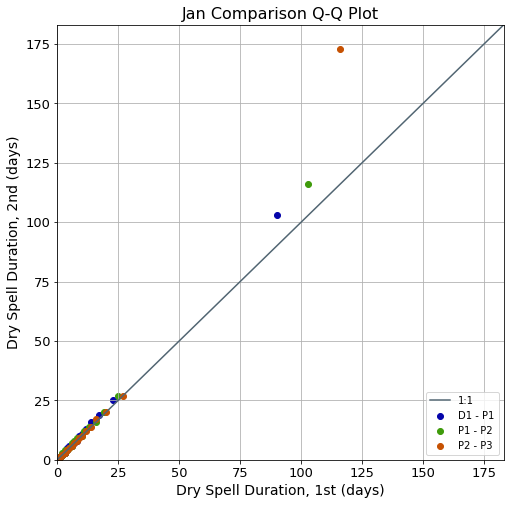

In [67]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JanD1Qs, JanP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JanP1Qs, JanP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JanP2Qs, JanP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

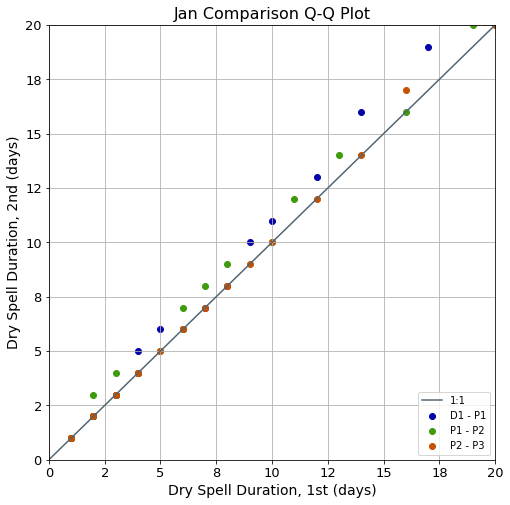

In [68]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JanD1Qs, JanP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JanP1Qs, JanP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JanP2Qs, JanP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

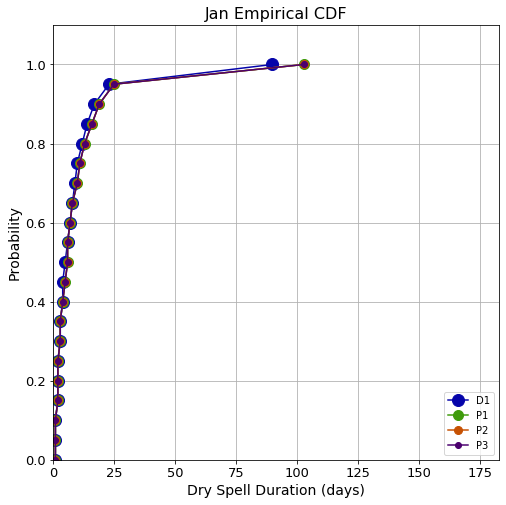

In [72]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JanD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( JanP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( JanP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( JanP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jan Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Feb

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [73]:
FebD1BSCI = sstats.bayes_mvs( np.array( FebD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [74]:
FebD1BSCI

(Mean(statistic=7.00758335968484, minmax=(6.9959344220790465, 7.019232297290633)),
 Variance(statistic=51.23113314669865, minmax=(51.11321835236079, 51.34904794103652)),
 Std_dev(statistic=7.157592692148572, minmax=(7.149355649373897, 7.165829734923248)))

In [75]:
FebD1BSCI[0][0], FebD1BSCI[0][1][0], FebD1BSCI[0][1][1]

(7.00758335968484, 6.9959344220790465, 7.019232297290633)

In [76]:
SD1Mean.append( FebD1BSCI[0][0] )
SD1MeanMinCI.append( FebD1BSCI[0][1][0] )
SD1MeanMaxCI.append( FebD1BSCI[0][1][1] )
SD1Var.append( FebD1BSCI[1][0] )
SD1VarMinCI.append( FebD1BSCI[1][1][0] )
SD1VarMaxCI.append( FebD1BSCI[1][1][1] )
SD1Std.append( FebD1BSCI[2][0] )
SD1StdMinCI.append( FebD1BSCI[2][1][0] )
SD1StdMaxCI.append( FebD1BSCI[2][1][1] )

In [77]:
FebP1BSCI = sstats.bayes_mvs( np.array( FebP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [78]:
SP1Mean.append( FebP1BSCI[0][0] )
SP1MeanMinCI.append( FebP1BSCI[0][1][0] )
SP1MeanMaxCI.append( FebP1BSCI[0][1][1] )
SP1Var.append( FebP1BSCI[1][0] )
SP1VarMinCI.append( FebP1BSCI[1][1][0] )
SP1VarMaxCI.append( FebP1BSCI[1][1][1] )
SP1Std.append( FebP1BSCI[2][0] )
SP1StdMinCI.append( FebP1BSCI[2][1][0] )
SP1StdMaxCI.append( FebP1BSCI[2][1][1] )

In [79]:
FebP2BSCI = sstats.bayes_mvs( np.array( FebP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [80]:
SP2Mean.append( FebP2BSCI[0][0] )
SP2MeanMinCI.append( FebP2BSCI[0][1][0] )
SP2MeanMaxCI.append( FebP2BSCI[0][1][1] )
SP2Var.append( FebP2BSCI[1][0] )
SP2VarMinCI.append( FebP2BSCI[1][1][0] )
SP2VarMaxCI.append( FebP2BSCI[1][1][1] )
SP2Std.append( FebP2BSCI[2][0] )
SP2StdMinCI.append( FebP2BSCI[2][1][0] )
SP2StdMaxCI.append( FebP2BSCI[2][1][1] )

In [81]:
FebP3BSCI = sstats.bayes_mvs( np.array( FebP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [82]:
SP3Mean.append( FebP3BSCI[0][0] )
SP3MeanMinCI.append( FebP3BSCI[0][1][0] )
SP3MeanMaxCI.append( FebP3BSCI[0][1][1] )
SP3Var.append( FebP3BSCI[1][0] )
SP3VarMinCI.append( FebP3BSCI[1][1][0] )
SP3VarMaxCI.append( FebP3BSCI[1][1][1] )
SP3Std.append( FebP3BSCI[2][0] )
SP3StdMinCI.append( FebP3BSCI[2][1][0] )
SP3StdMaxCI.append( FebP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [83]:
FebTTD1toP1 = sstats.ttest_ind( np.array( FebD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( FebP1DF["Dry_Count"], dtype=np.int32 ) )

In [84]:
FebTTD1toP1Pval = FebTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % FebTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 1.32002e-51


In [85]:
FebTTP1toP2 = sstats.ttest_ind( np.array( FebP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( FebP2DF["Dry_Count"], dtype=np.int32 ) )

In [86]:
FebTTP1toP2Pval = FebTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % FebTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 9.08895e-181


In [87]:
FebTTP2toP3 = sstats.ttest_ind( np.array( FebP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( FebP3DF["Dry_Count"], dtype=np.int32 ) )

In [88]:
FebTTP2toP3Pval = FebTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % FebTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 2.19066e-258


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [89]:
FebMWUD1toP1 = sstats.mannwhitneyu( np.array( FebD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( FebP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [90]:
FebMWUD1toP1Pval = FebMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % FebMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 5.79096e-20


In [91]:
FebMWUP1toP2 = sstats.mannwhitneyu( np.array( FebP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( FebP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [92]:
FebMWUP1toP2Pval = FebMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % FebMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 8.56408e-140


In [93]:
FebMWUP2toP3 = sstats.mannwhitneyu( np.array( FebP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( FebP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [94]:
FebMWUP2toP3Pval = FebMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % FebMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 2.27135e-55


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [95]:
FebKWD1toP1 = sstats.kruskal( np.array( FebD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( FebP1DF["Dry_Count"], dtype=np.int32 ) )

In [96]:
FebKWD1toP1Pval = FebKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % FebKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [97]:
FebKWP1toP2 = sstats.kruskal( np.array( FebP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( FebP2DF["Dry_Count"], dtype=np.int32 ) )

In [98]:
FebKWP1toP2Pval = FebKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % FebKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [99]:
FebKWP2toP3 = sstats.kruskal( np.array( FebP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( FebP3DF["Dry_Count"], dtype=np.int32 ) )

In [100]:
FebKWP2toP3Pval = FebKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % FebKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 0


In [101]:
FebD1DF["Dry_Count"].median(), FebP1DF["Dry_Count"].median(), FebP2DF["Dry_Count"].median(), FebP3DF["Dry_Count"].median()

(5.0, 5.0, 5.0, 5.0)

#### Plots

In [102]:
FebD1Qs = FebD1DF["Dry_Count"].quantile(q=nCompQs)
FebP1Qs = FebP1DF["Dry_Count"].quantile(q=nCompQs)
FebP2Qs = FebP2DF["Dry_Count"].quantile(q=nCompQs)
FebP3Qs = FebP3DF["Dry_Count"].quantile(q=nCompQs)

In [103]:
maxQs = max( FebD1Qs.max(), FebP1Qs.max(), FebP2Qs.max(), FebP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

156.0

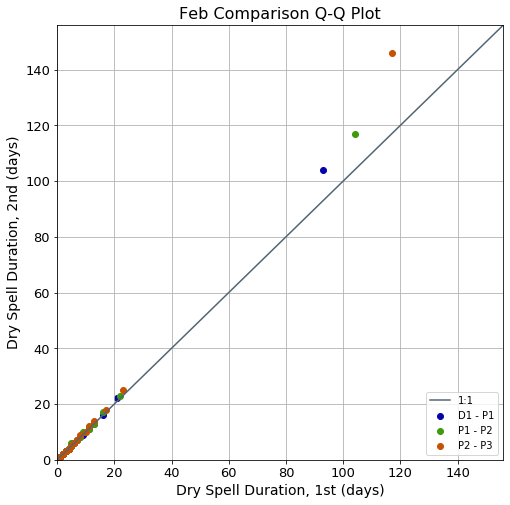

In [104]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( FebD1Qs, FebP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( FebP1Qs, FebP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( FebP2Qs, FebP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

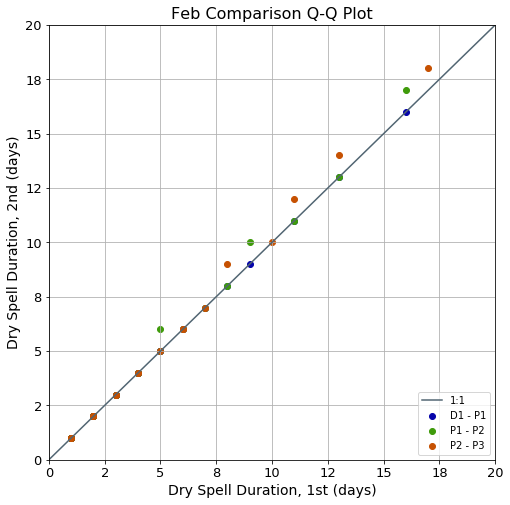

In [105]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( FebD1Qs, FebP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( FebP1Qs, FebP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( FebP2Qs, FebP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

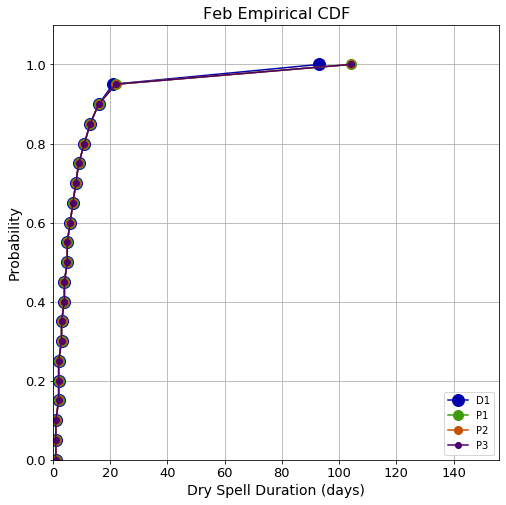

In [106]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( FebD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( FebP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( FebP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( FebP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Feb Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Mar

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [107]:
MarD1BSCI = sstats.bayes_mvs( np.array( MarD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [108]:
MarD1BSCI

(Mean(statistic=6.98840887638443, minmax=(6.977911736693587, 6.9989060160752725)),
 Variance(statistic=44.701005624934275, minmax=(44.60175240127626, 44.80025884859229)),
 Std_dev(statistic=6.6858810657185845, minmax=(6.678458467060127, 6.6933036643770425)))

In [109]:
MarD1BSCI[0][0], MarD1BSCI[0][1][0], MarD1BSCI[0][1][1]

(6.98840887638443, 6.977911736693587, 6.9989060160752725)

In [110]:
SD1Mean.append( MarD1BSCI[0][0] )
SD1MeanMinCI.append( MarD1BSCI[0][1][0] )
SD1MeanMaxCI.append( MarD1BSCI[0][1][1] )
SD1Var.append( MarD1BSCI[1][0] )
SD1VarMinCI.append( MarD1BSCI[1][1][0] )
SD1VarMaxCI.append( MarD1BSCI[1][1][1] )
SD1Std.append( MarD1BSCI[2][0] )
SD1StdMinCI.append( MarD1BSCI[2][1][0] )
SD1StdMaxCI.append( MarD1BSCI[2][1][1] )

In [111]:
MarP1BSCI = sstats.bayes_mvs( np.array( MarP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [112]:
SP1Mean.append( MarP1BSCI[0][0] )
SP1MeanMinCI.append( MarP1BSCI[0][1][0] )
SP1MeanMaxCI.append( MarP1BSCI[0][1][1] )
SP1Var.append( MarP1BSCI[1][0] )
SP1VarMinCI.append( MarP1BSCI[1][1][0] )
SP1VarMaxCI.append( MarP1BSCI[1][1][1] )
SP1Std.append( MarP1BSCI[2][0] )
SP1StdMinCI.append( MarP1BSCI[2][1][0] )
SP1StdMaxCI.append( MarP1BSCI[2][1][1] )

In [113]:
MarP2BSCI = sstats.bayes_mvs( np.array( MarP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [114]:
SP2Mean.append( MarP2BSCI[0][0] )
SP2MeanMinCI.append( MarP2BSCI[0][1][0] )
SP2MeanMaxCI.append( MarP2BSCI[0][1][1] )
SP2Var.append( MarP2BSCI[1][0] )
SP2VarMinCI.append( MarP2BSCI[1][1][0] )
SP2VarMaxCI.append( MarP2BSCI[1][1][1] )
SP2Std.append( MarP2BSCI[2][0] )
SP2StdMinCI.append( MarP2BSCI[2][1][0] )
SP2StdMaxCI.append( MarP2BSCI[2][1][1] )

In [115]:
MarP3BSCI = sstats.bayes_mvs( np.array( MarP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [116]:
SP3Mean.append( MarP3BSCI[0][0] )
SP3MeanMinCI.append( MarP3BSCI[0][1][0] )
SP3MeanMaxCI.append( MarP3BSCI[0][1][1] )
SP3Var.append( MarP3BSCI[1][0] )
SP3VarMinCI.append( MarP3BSCI[1][1][0] )
SP3VarMaxCI.append( MarP3BSCI[1][1][1] )
SP3Std.append( MarP3BSCI[2][0] )
SP3StdMinCI.append( MarP3BSCI[2][1][0] )
SP3StdMaxCI.append( MarP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [117]:
MarTTD1toP1 = sstats.ttest_ind( np.array( MarD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( MarP1DF["Dry_Count"], dtype=np.int32 ) )

In [118]:
MarTTD1toP1Pval = MarTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % MarTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 1.74813e-70


In [119]:
MarTTP1toP2 = sstats.ttest_ind( np.array( MarP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( MarP2DF["Dry_Count"], dtype=np.int32 ) )

In [120]:
MarTTP1toP2Pval = MarTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % MarTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 0


In [121]:
MarTTP2toP3 = sstats.ttest_ind( np.array( MarP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( MarP3DF["Dry_Count"], dtype=np.int32 ) )

In [122]:
MarTTP2toP3Pval = MarTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % MarTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 0.00313923


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [123]:
MarMWUD1toP1 = sstats.mannwhitneyu( np.array( MarD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( MarP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [124]:
MarMWUD1toP1Pval = MarMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % MarMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 5.7114e-56


In [125]:
MarMWUP1toP2 = sstats.mannwhitneyu( np.array( MarP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( MarP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [126]:
MarMWUP1toP2Pval = MarMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % MarMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 0


In [127]:
MarMWUP2toP3 = sstats.mannwhitneyu( np.array( MarP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( MarP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [128]:
MarMWUP2toP3Pval = MarMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % MarMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 0.0541416


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [129]:
MarKWD1toP1 = sstats.kruskal( np.array( MarD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( MarP1DF["Dry_Count"], dtype=np.int32 ) )

In [130]:
MarKWD1toP1Pval = MarKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % MarKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 0


In [131]:
MarKWP1toP2 = sstats.kruskal( np.array( MarP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( MarP2DF["Dry_Count"], dtype=np.int32 ) )

In [132]:
MarKWP1toP2Pval = MarKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % MarKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 1


In [133]:
MarKWP2toP3 = sstats.kruskal( np.array( MarP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( MarP3DF["Dry_Count"], dtype=np.int32 ) )

In [134]:
MarKWP2toP3Pval = MarKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % MarKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [135]:
MarD1DF["Dry_Count"].median(), MarP1DF["Dry_Count"].median(), MarP2DF["Dry_Count"].median(), MarP3DF["Dry_Count"].median()

(5.0, 5.0, 5.0, 5.0)

#### Plots

In [136]:
MarD1Qs = MarD1DF["Dry_Count"].quantile(q=nCompQs)
MarP1Qs = MarP1DF["Dry_Count"].quantile(q=nCompQs)
MarP2Qs = MarP2DF["Dry_Count"].quantile(q=nCompQs)
MarP3Qs = MarP3DF["Dry_Count"].quantile(q=nCompQs)

In [137]:
maxQs = max( MarD1Qs.max(), MarP1Qs.max(), MarP2Qs.max(), MarP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

128.0

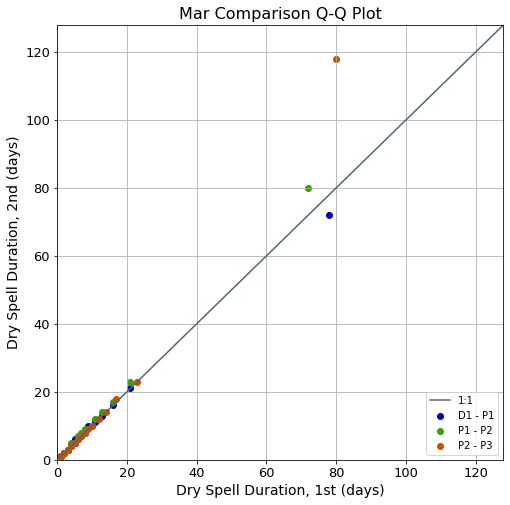

In [138]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MarD1Qs, MarP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( MarP1Qs, MarP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( MarP2Qs, MarP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

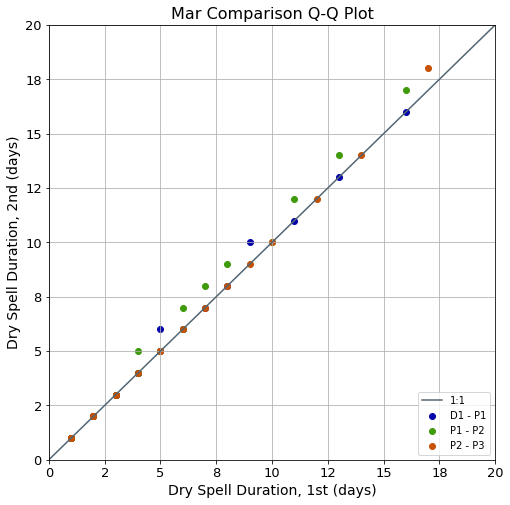

In [139]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MarD1Qs, MarP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( MarP1Qs, MarP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( MarP2Qs, MarP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

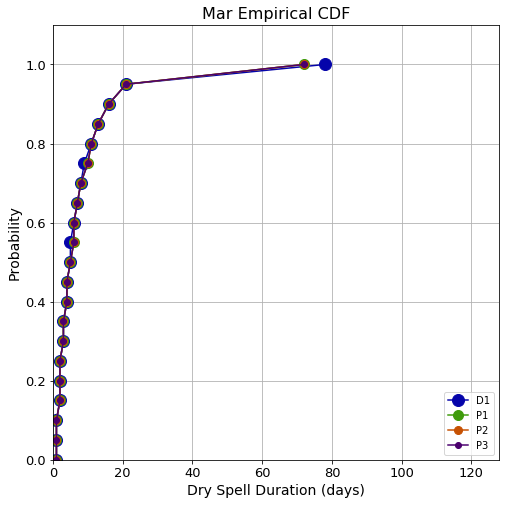

In [140]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( MarD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( MarP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( MarP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( MarP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Mar Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Apr

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [141]:
AprD1BSCI = sstats.bayes_mvs( np.array( AprD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [142]:
AprD1BSCI

(Mean(statistic=5.137130220249104, minmax=(5.130094710622969, 5.1441657298752395)),
 Variance(statistic=22.03902854028654, minmax=(21.9923188720043, 22.08573820856878)),
 Std_dev(statistic=4.6945743726440785, minmax=(4.689599516078335, 4.699549229209822)))

In [143]:
AprD1BSCI[0][0], AprD1BSCI[0][1][0], AprD1BSCI[0][1][1]

(5.137130220249104, 5.130094710622969, 5.1441657298752395)

In [144]:
SD1Mean.append( AprD1BSCI[0][0] )
SD1MeanMinCI.append( AprD1BSCI[0][1][0] )
SD1MeanMaxCI.append( AprD1BSCI[0][1][1] )
SD1Var.append( AprD1BSCI[1][0] )
SD1VarMinCI.append( AprD1BSCI[1][1][0] )
SD1VarMaxCI.append( AprD1BSCI[1][1][1] )
SD1Std.append( AprD1BSCI[2][0] )
SD1StdMinCI.append( AprD1BSCI[2][1][0] )
SD1StdMaxCI.append( AprD1BSCI[2][1][1] )

In [145]:
AprP1BSCI = sstats.bayes_mvs( np.array( AprP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [146]:
SP1Mean.append( AprP1BSCI[0][0] )
SP1MeanMinCI.append( AprP1BSCI[0][1][0] )
SP1MeanMaxCI.append( AprP1BSCI[0][1][1] )
SP1Var.append( AprP1BSCI[1][0] )
SP1VarMinCI.append( AprP1BSCI[1][1][0] )
SP1VarMaxCI.append( AprP1BSCI[1][1][1] )
SP1Std.append( AprP1BSCI[2][0] )
SP1StdMinCI.append( AprP1BSCI[2][1][0] )
SP1StdMaxCI.append( AprP1BSCI[2][1][1] )

In [147]:
AprP2BSCI = sstats.bayes_mvs( np.array( AprP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [148]:
SP2Mean.append( AprP2BSCI[0][0] )
SP2MeanMinCI.append( AprP2BSCI[0][1][0] )
SP2MeanMaxCI.append( AprP2BSCI[0][1][1] )
SP2Var.append( AprP2BSCI[1][0] )
SP2VarMinCI.append( AprP2BSCI[1][1][0] )
SP2VarMaxCI.append( AprP2BSCI[1][1][1] )
SP2Std.append( AprP2BSCI[2][0] )
SP2StdMinCI.append( AprP2BSCI[2][1][0] )
SP2StdMaxCI.append( AprP2BSCI[2][1][1] )

In [149]:
AprP3BSCI = sstats.bayes_mvs( np.array( AprP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [150]:
SP3Mean.append( AprP3BSCI[0][0] )
SP3MeanMinCI.append( AprP3BSCI[0][1][0] )
SP3MeanMaxCI.append( AprP3BSCI[0][1][1] )
SP3Var.append( AprP3BSCI[1][0] )
SP3VarMinCI.append( AprP3BSCI[1][1][0] )
SP3VarMaxCI.append( AprP3BSCI[1][1][1] )
SP3Std.append( AprP3BSCI[2][0] )
SP3StdMinCI.append( AprP3BSCI[2][1][0] )
SP3StdMaxCI.append( AprP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [151]:
AprTTD1toP1 = sstats.ttest_ind( np.array( AprD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( AprP1DF["Dry_Count"], dtype=np.int32 ) )

In [152]:
AprTTD1toP1Pval = AprTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % AprTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 4.04338e-192


In [153]:
AprTTP1toP2 = sstats.ttest_ind( np.array( AprP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( AprP2DF["Dry_Count"], dtype=np.int32 ) )

In [154]:
AprTTP1toP2Pval = AprTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % AprTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 6.19355e-84


In [155]:
AprTTP2toP3 = sstats.ttest_ind( np.array( AprP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( AprP3DF["Dry_Count"], dtype=np.int32 ) )

In [156]:
AprTTP2toP3Pval = AprTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % AprTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 4.50268e-107


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [157]:
AprMWUD1toP1 = sstats.mannwhitneyu( np.array( AprD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( AprP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [158]:
AprMWUD1toP1Pval = AprMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % AprMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 1.96995e-62


In [159]:
AprMWUP1toP2 = sstats.mannwhitneyu( np.array( AprP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( AprP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [160]:
AprMWUP1toP2Pval = AprMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % AprMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 5.83502e-09


In [161]:
AprMWUP2toP3 = sstats.mannwhitneyu( np.array( AprP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( AprP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [162]:
AprMWUP2toP3Pval = AprMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % AprMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 4.47096e-95


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [163]:
AprKWD1toP1 = sstats.kruskal( np.array( AprD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( AprP1DF["Dry_Count"], dtype=np.int32 ) )

In [164]:
AprKWD1toP1Pval = AprKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % AprKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [165]:
AprKWP1toP2 = sstats.kruskal( np.array( AprP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( AprP2DF["Dry_Count"], dtype=np.int32 ) )

In [166]:
AprKWP1toP2Pval = AprKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % AprKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 1


In [167]:
AprKWP2toP3 = sstats.kruskal( np.array( AprP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( AprP3DF["Dry_Count"], dtype=np.int32 ) )

In [168]:
AprKWP2toP3Pval = AprKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % AprKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [169]:
AprD1DF["Dry_Count"].median(), AprP1DF["Dry_Count"].median(), AprP2DF["Dry_Count"].median(), AprP3DF["Dry_Count"].median()

(4.0, 4.0, 4.0, 4.0)

#### Plots

In [170]:
AprD1Qs = AprD1DF["Dry_Count"].quantile(q=nCompQs)
AprP1Qs = AprP1DF["Dry_Count"].quantile(q=nCompQs)
AprP2Qs = AprP2DF["Dry_Count"].quantile(q=nCompQs)
AprP3Qs = AprP3DF["Dry_Count"].quantile(q=nCompQs)

In [171]:
maxQs = max( AprD1Qs.max(), AprP1Qs.max(), AprP2Qs.max(), AprP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

86.0

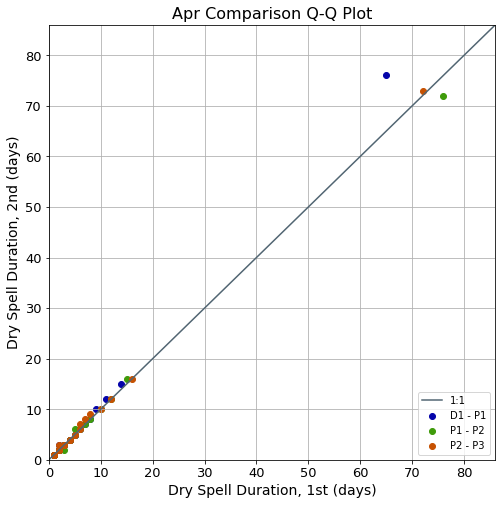

In [172]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AprD1Qs, AprP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( AprP1Qs, AprP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( AprP2Qs, AprP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

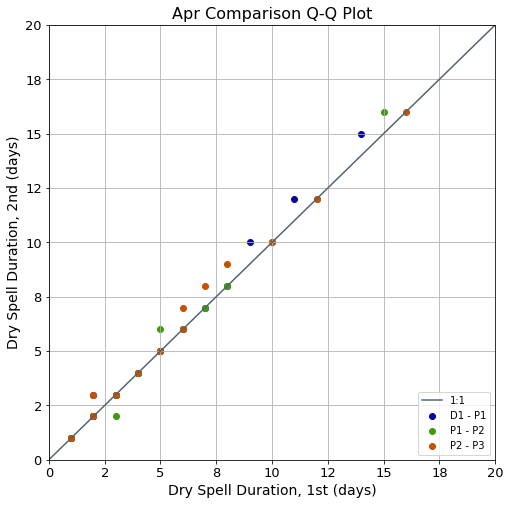

In [173]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AprD1Qs, AprP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( AprP1Qs, AprP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( AprP2Qs, AprP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

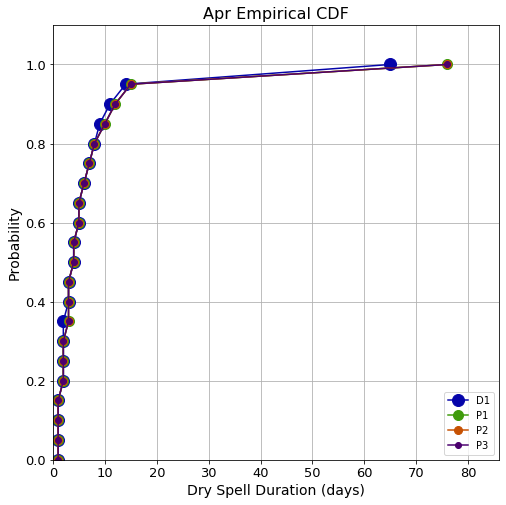

In [174]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AprD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( AprP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( AprP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( AprP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Apr Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### May

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [175]:
MayD1BSCI = sstats.bayes_mvs( np.array( MayD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [176]:
MayD1BSCI

(Mean(statistic=4.141580800745389, minmax=(4.13579302839125, 4.147368573099529)),
 Variance(statistic=18.072329023910257, minmax=(18.03753268908028, 18.107125358740234)),
 Std_dev(statistic=4.251156198484155, minmax=(4.2470636254045795, 4.255248771563731)))

In [177]:
MayD1BSCI[0][0], MayD1BSCI[0][1][0], MayD1BSCI[0][1][1]

(4.141580800745389, 4.13579302839125, 4.147368573099529)

In [178]:
SD1Mean.append( MayD1BSCI[0][0] )
SD1MeanMinCI.append( MayD1BSCI[0][1][0] )
SD1MeanMaxCI.append( MayD1BSCI[0][1][1] )
SD1Var.append( MayD1BSCI[1][0] )
SD1VarMinCI.append( MayD1BSCI[1][1][0] )
SD1VarMaxCI.append( MayD1BSCI[1][1][1] )
SD1Std.append( MayD1BSCI[2][0] )
SD1StdMinCI.append( MayD1BSCI[2][1][0] )
SD1StdMaxCI.append( MayD1BSCI[2][1][1] )

In [179]:
MayP1BSCI = sstats.bayes_mvs( np.array( MayP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [180]:
SP1Mean.append( MayP1BSCI[0][0] )
SP1MeanMinCI.append( MayP1BSCI[0][1][0] )
SP1MeanMaxCI.append( MayP1BSCI[0][1][1] )
SP1Var.append( MayP1BSCI[1][0] )
SP1VarMinCI.append( MayP1BSCI[1][1][0] )
SP1VarMaxCI.append( MayP1BSCI[1][1][1] )
SP1Std.append( MayP1BSCI[2][0] )
SP1StdMinCI.append( MayP1BSCI[2][1][0] )
SP1StdMaxCI.append( MayP1BSCI[2][1][1] )

In [181]:
MayP2BSCI = sstats.bayes_mvs( np.array( MayP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [182]:
SP2Mean.append( MayP2BSCI[0][0] )
SP2MeanMinCI.append( MayP2BSCI[0][1][0] )
SP2MeanMaxCI.append( MayP2BSCI[0][1][1] )
SP2Var.append( MayP2BSCI[1][0] )
SP2VarMinCI.append( MayP2BSCI[1][1][0] )
SP2VarMaxCI.append( MayP2BSCI[1][1][1] )
SP2Std.append( MayP2BSCI[2][0] )
SP2StdMinCI.append( MayP2BSCI[2][1][0] )
SP2StdMaxCI.append( MayP2BSCI[2][1][1] )

In [183]:
MayP3BSCI = sstats.bayes_mvs( np.array( MayP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [184]:
SP3Mean.append( MayP3BSCI[0][0] )
SP3MeanMinCI.append( MayP3BSCI[0][1][0] )
SP3MeanMaxCI.append( MayP3BSCI[0][1][1] )
SP3Var.append( MayP3BSCI[1][0] )
SP3VarMinCI.append( MayP3BSCI[1][1][0] )
SP3VarMaxCI.append( MayP3BSCI[1][1][1] )
SP3Std.append( MayP3BSCI[2][0] )
SP3StdMinCI.append( MayP3BSCI[2][1][0] )
SP3StdMaxCI.append( MayP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [185]:
MayTTD1toP1 = sstats.ttest_ind( np.array( MayD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( MayP1DF["Dry_Count"], dtype=np.int32 ) )

In [186]:
MayTTD1toP1Pval = MayTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % MayTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 0


In [187]:
MayTTP1toP2 = sstats.ttest_ind( np.array( MayP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( MayP2DF["Dry_Count"], dtype=np.int32 ) )

In [188]:
MayTTP1toP2Pval = MayTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % MayTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 0


In [189]:
MayTTP2toP3 = sstats.ttest_ind( np.array( MayP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( MayP3DF["Dry_Count"], dtype=np.int32 ) )

In [190]:
MayTTP2toP3Pval = MayTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % MayTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 2.12081e-172


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [191]:
MayMWUD1toP1 = sstats.mannwhitneyu( np.array( MayD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( MayP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [192]:
MayMWUD1toP1Pval = MayMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % MayMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 0


In [193]:
MayMWUP1toP2 = sstats.mannwhitneyu( np.array( MayP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( MayP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [194]:
MayMWUP1toP2Pval = MayMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % MayMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 1.25311e-189


In [195]:
MayMWUP2toP3 = sstats.mannwhitneyu( np.array( MayP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( MayP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [196]:
MayMWUP2toP3Pval = MayMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % MayMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 1.58072e-45


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [197]:
MayKWD1toP1 = sstats.kruskal( np.array( MayD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( MayP1DF["Dry_Count"], dtype=np.int32 ) )

In [198]:
MayKWD1toP1Pval = MayKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % MayKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [199]:
MayKWP1toP2 = sstats.kruskal( np.array( MayP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( MayP2DF["Dry_Count"], dtype=np.int32 ) )

In [200]:
MayKWP1toP2Pval = MayKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % MayKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [201]:
MayKWP2toP3 = sstats.kruskal( np.array( MayP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( MayP3DF["Dry_Count"], dtype=np.int32 ) )

In [202]:
MayKWP2toP3Pval = MayKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % MayKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [203]:
MayD1DF["Dry_Count"].median(), MayP1DF["Dry_Count"].median(), MayP2DF["Dry_Count"].median(), MayP3DF["Dry_Count"].median()

(3.0, 3.0, 3.0, 3.0)

#### Plots

In [204]:
MayD1Qs = MayD1DF["Dry_Count"].quantile(q=nCompQs)
MayP1Qs = MayP1DF["Dry_Count"].quantile(q=nCompQs)
MayP2Qs = MayP2DF["Dry_Count"].quantile(q=nCompQs)
MayP3Qs = MayP3DF["Dry_Count"].quantile(q=nCompQs)

In [205]:
maxQs = max( MayD1Qs.max(), MayP1Qs.max(), MayP2Qs.max(), MayP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

130.0

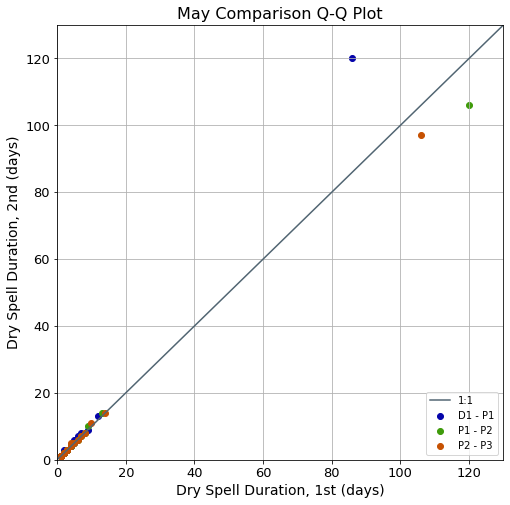

In [206]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MayD1Qs, MayP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( MayP1Qs, MayP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( MayP2Qs, MayP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

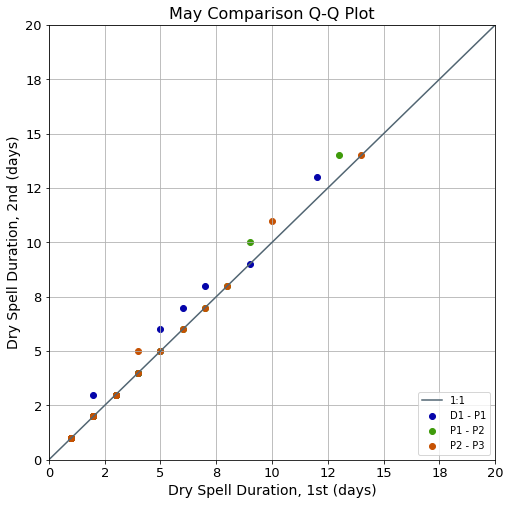

In [207]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MayD1Qs, MayP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( MayP1Qs, MayP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( MayP2Qs, MayP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

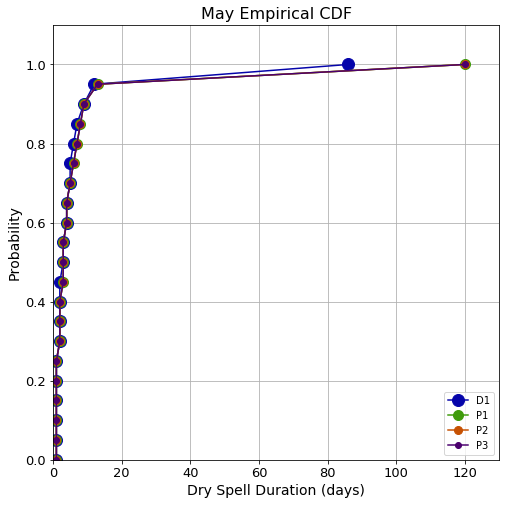

In [208]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( MayD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( MayP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( MayP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( MayP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('May Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jun

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [209]:
JunD1BSCI = sstats.bayes_mvs( np.array( JunD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [210]:
JunD1BSCI

(Mean(statistic=5.525915626387105, minmax=(5.515992008029496, 5.5358392447447144)),
 Variance(statistic=46.41333572696477, minmax=(46.31772503907819, 46.508946414851344)),
 Std_dev(statistic=6.81273335211094, minmax=(6.805716294276367, 6.819750409945513)))

In [211]:
JunD1BSCI[0][0], JunD1BSCI[0][1][0], JunD1BSCI[0][1][1]

(5.525915626387105, 5.515992008029496, 5.5358392447447144)

In [212]:
SD1Mean.append( JunD1BSCI[0][0] )
SD1MeanMinCI.append( JunD1BSCI[0][1][0] )
SD1MeanMaxCI.append( JunD1BSCI[0][1][1] )
SD1Var.append( JunD1BSCI[1][0] )
SD1VarMinCI.append( JunD1BSCI[1][1][0] )
SD1VarMaxCI.append( JunD1BSCI[1][1][1] )
SD1Std.append( JunD1BSCI[2][0] )
SD1StdMinCI.append( JunD1BSCI[2][1][0] )
SD1StdMaxCI.append( JunD1BSCI[2][1][1] )

In [213]:
JunP1BSCI = sstats.bayes_mvs( np.array( JunP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [214]:
SP1Mean.append( JunP1BSCI[0][0] )
SP1MeanMinCI.append( JunP1BSCI[0][1][0] )
SP1MeanMaxCI.append( JunP1BSCI[0][1][1] )
SP1Var.append( JunP1BSCI[1][0] )
SP1VarMinCI.append( JunP1BSCI[1][1][0] )
SP1VarMaxCI.append( JunP1BSCI[1][1][1] )
SP1Std.append( JunP1BSCI[2][0] )
SP1StdMinCI.append( JunP1BSCI[2][1][0] )
SP1StdMaxCI.append( JunP1BSCI[2][1][1] )

In [215]:
JunP2BSCI = sstats.bayes_mvs( np.array( JunP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [216]:
SP2Mean.append( JunP2BSCI[0][0] )
SP2MeanMinCI.append( JunP2BSCI[0][1][0] )
SP2MeanMaxCI.append( JunP2BSCI[0][1][1] )
SP2Var.append( JunP2BSCI[1][0] )
SP2VarMinCI.append( JunP2BSCI[1][1][0] )
SP2VarMaxCI.append( JunP2BSCI[1][1][1] )
SP2Std.append( JunP2BSCI[2][0] )
SP2StdMinCI.append( JunP2BSCI[2][1][0] )
SP2StdMaxCI.append( JunP2BSCI[2][1][1] )

In [217]:
JunP3BSCI = sstats.bayes_mvs( np.array( JunP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [218]:
SP3Mean.append( JunP3BSCI[0][0] )
SP3MeanMinCI.append( JunP3BSCI[0][1][0] )
SP3MeanMaxCI.append( JunP3BSCI[0][1][1] )
SP3Var.append( JunP3BSCI[1][0] )
SP3VarMinCI.append( JunP3BSCI[1][1][0] )
SP3VarMaxCI.append( JunP3BSCI[1][1][1] )
SP3Std.append( JunP3BSCI[2][0] )
SP3StdMinCI.append( JunP3BSCI[2][1][0] )
SP3StdMaxCI.append( JunP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [219]:
JunTTD1toP1 = sstats.ttest_ind( np.array( JunD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JunP1DF["Dry_Count"], dtype=np.int32 ) )

In [220]:
JunTTD1toP1Pval = JunTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % JunTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 0


In [221]:
JunTTP1toP2 = sstats.ttest_ind( np.array( JunP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JunP2DF["Dry_Count"], dtype=np.int32 ) )

In [222]:
JunTTP1toP2Pval = JunTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % JunTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 2.5364e-106


In [223]:
JunTTP2toP3 = sstats.ttest_ind( np.array( JunP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JunP3DF["Dry_Count"], dtype=np.int32 ) )

In [224]:
JunTTP2toP3Pval = JunTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % JunTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 1.6707e-149


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [225]:
JunMWUD1toP1 = sstats.mannwhitneyu( np.array( JunD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JunP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [226]:
JunMWUD1toP1Pval = JunMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % JunMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 5.78081e-125


In [227]:
JunMWUP1toP2 = sstats.mannwhitneyu( np.array( JunP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JunP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [228]:
JunMWUP1toP2Pval = JunMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % JunMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 1.31485e-50


In [229]:
JunMWUP2toP3 = sstats.mannwhitneyu( np.array( JunP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JunP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [230]:
JunMWUP2toP3Pval = JunMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % JunMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 1.24831e-104


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [231]:
JunKWD1toP1 = sstats.kruskal( np.array( JunD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JunP1DF["Dry_Count"], dtype=np.int32 ) )

In [232]:
JunKWD1toP1Pval = JunKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % JunKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 0


In [233]:
JunKWP1toP2 = sstats.kruskal( np.array( JunP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JunP2DF["Dry_Count"], dtype=np.int32 ) )

In [234]:
JunKWP1toP2Pval = JunKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % JunKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [235]:
JunKWP2toP3 = sstats.kruskal( np.array( JunP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JunP3DF["Dry_Count"], dtype=np.int32 ) )

In [236]:
JunKWP2toP3Pval = JunKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % JunKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [237]:
JunD1DF["Dry_Count"].median(), JunP1DF["Dry_Count"].median(), JunP2DF["Dry_Count"].median(), JunP3DF["Dry_Count"].median()

(3.0, 3.0, 3.0, 3.0)

#### Plots

In [238]:
JunD1Qs = JunD1DF["Dry_Count"].quantile(q=nCompQs)
JunP1Qs = JunP1DF["Dry_Count"].quantile(q=nCompQs)
JunP2Qs = JunP2DF["Dry_Count"].quantile(q=nCompQs)
JunP3Qs = JunP3DF["Dry_Count"].quantile(q=nCompQs)

In [239]:
maxQs = max( JunD1Qs.max(), JunP1Qs.max(), JunP2Qs.max(), JunP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

134.0

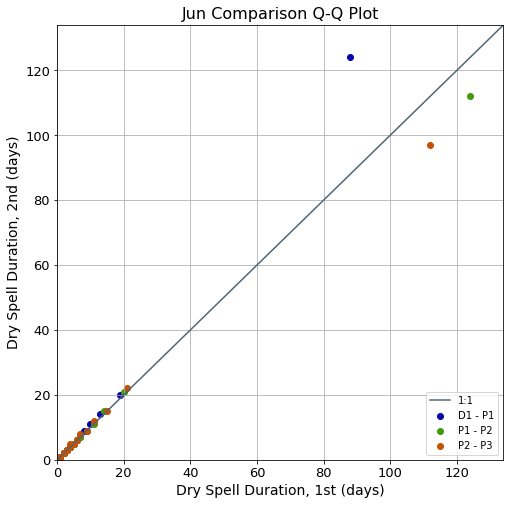

In [240]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JunD1Qs, JunP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JunP1Qs, JunP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JunP2Qs, JunP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

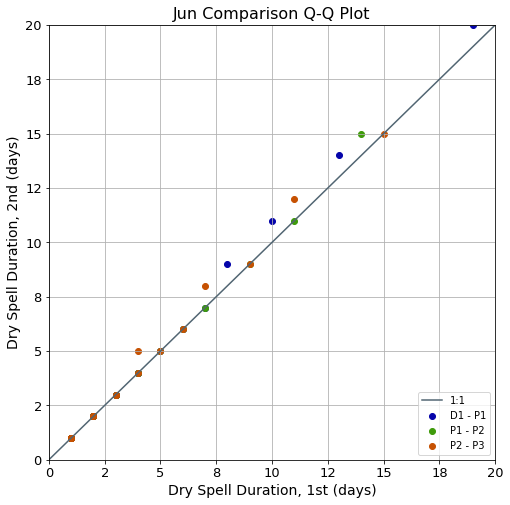

In [241]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JunD1Qs, JunP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JunP1Qs, JunP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JunP2Qs, JunP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

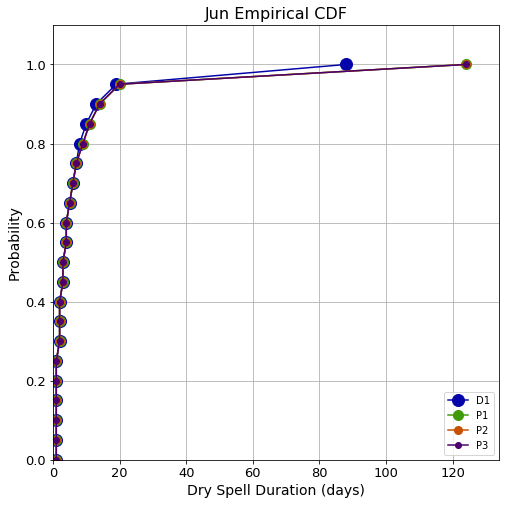

In [242]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JunD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( JunP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( JunP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( JunP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jun Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jul

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [243]:
JulD1BSCI = sstats.bayes_mvs( np.array( JulD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [244]:
JulD1BSCI

(Mean(statistic=6.813155046394791, minmax=(6.801251265624176, 6.825058827165406)),
 Variance(statistic=54.823845890527906, minmax=(54.699198076441995, 54.94849370461382)),
 Std_dev(statistic=7.404312654833527, minmax=(7.395895410728867, 7.412729898938187)))

In [245]:
JulD1BSCI[0][0], JulD1BSCI[0][1][0], JulD1BSCI[0][1][1]

(6.813155046394791, 6.801251265624176, 6.825058827165406)

In [246]:
SD1Mean.append( JulD1BSCI[0][0] )
SD1MeanMinCI.append( JulD1BSCI[0][1][0] )
SD1MeanMaxCI.append( JulD1BSCI[0][1][1] )
SD1Var.append( JulD1BSCI[1][0] )
SD1VarMinCI.append( JulD1BSCI[1][1][0] )
SD1VarMaxCI.append( JulD1BSCI[1][1][1] )
SD1Std.append( JulD1BSCI[2][0] )
SD1StdMinCI.append( JulD1BSCI[2][1][0] )
SD1StdMaxCI.append( JulD1BSCI[2][1][1] )

In [247]:
JulP1BSCI = sstats.bayes_mvs( np.array( JulP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [248]:
SP1Mean.append( JulP1BSCI[0][0] )
SP1MeanMinCI.append( JulP1BSCI[0][1][0] )
SP1MeanMaxCI.append( JulP1BSCI[0][1][1] )
SP1Var.append( JulP1BSCI[1][0] )
SP1VarMinCI.append( JulP1BSCI[1][1][0] )
SP1VarMaxCI.append( JulP1BSCI[1][1][1] )
SP1Std.append( JulP1BSCI[2][0] )
SP1StdMinCI.append( JulP1BSCI[2][1][0] )
SP1StdMaxCI.append( JulP1BSCI[2][1][1] )

In [249]:
JulP2BSCI = sstats.bayes_mvs( np.array( JulP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [250]:
SP2Mean.append( JulP2BSCI[0][0] )
SP2MeanMinCI.append( JulP2BSCI[0][1][0] )
SP2MeanMaxCI.append( JulP2BSCI[0][1][1] )
SP2Var.append( JulP2BSCI[1][0] )
SP2VarMinCI.append( JulP2BSCI[1][1][0] )
SP2VarMaxCI.append( JulP2BSCI[1][1][1] )
SP2Std.append( JulP2BSCI[2][0] )
SP2StdMinCI.append( JulP2BSCI[2][1][0] )
SP2StdMaxCI.append( JulP2BSCI[2][1][1] )

In [251]:
JulP3BSCI = sstats.bayes_mvs( np.array( JulP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [252]:
SP3Mean.append( JulP3BSCI[0][0] )
SP3MeanMinCI.append( JulP3BSCI[0][1][0] )
SP3MeanMaxCI.append( JulP3BSCI[0][1][1] )
SP3Var.append( JulP3BSCI[1][0] )
SP3VarMinCI.append( JulP3BSCI[1][1][0] )
SP3VarMaxCI.append( JulP3BSCI[1][1][1] )
SP3Std.append( JulP3BSCI[2][0] )
SP3StdMinCI.append( JulP3BSCI[2][1][0] )
SP3StdMaxCI.append( JulP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [253]:
JulTTD1toP1 = sstats.ttest_ind( np.array( JulD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JulP1DF["Dry_Count"], dtype=np.int32 ) )

In [254]:
JulTTD1toP1Pval = JulTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % JulTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 1.55391e-218


In [255]:
JulTTP1toP2 = sstats.ttest_ind( np.array( JulP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JulP2DF["Dry_Count"], dtype=np.int32 ) )

In [256]:
JulTTP1toP2Pval = JulTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % JulTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 1.37837e-38


In [257]:
JulTTP2toP3 = sstats.ttest_ind( np.array( JulP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JulP3DF["Dry_Count"], dtype=np.int32 ) )

In [258]:
JulTTP2toP3Pval = JulTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % JulTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 1.53123e-162


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [259]:
JulMWUD1toP1 = sstats.mannwhitneyu( np.array( JulD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JulP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [260]:
JulMWUD1toP1Pval = JulMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % JulMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 2.29022e-128


In [261]:
JulMWUP1toP2 = sstats.mannwhitneyu( np.array( JulP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JulP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [262]:
JulMWUP1toP2Pval = JulMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % JulMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 0.0349581


In [263]:
JulMWUP2toP3 = sstats.mannwhitneyu( np.array( JulP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JulP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [264]:
JulMWUP2toP3Pval = JulMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % JulMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 3.65471e-177


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [265]:
JulKWD1toP1 = sstats.kruskal( np.array( JulD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JulP1DF["Dry_Count"], dtype=np.int32 ) )

In [266]:
JulKWD1toP1Pval = JulKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % JulKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [267]:
JulKWP1toP2 = sstats.kruskal( np.array( JulP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JulP2DF["Dry_Count"], dtype=np.int32 ) )

In [268]:
JulKWP1toP2Pval = JulKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % JulKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 1


In [269]:
JulKWP2toP3 = sstats.kruskal( np.array( JulP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JulP3DF["Dry_Count"], dtype=np.int32 ) )

In [270]:
JulKWP2toP3Pval = JulKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % JulKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [271]:
JulD1DF["Dry_Count"].median(), JulP1DF["Dry_Count"].median(), JulP2DF["Dry_Count"].median(), JulP3DF["Dry_Count"].median()

(4.0, 4.0, 4.0, 5.0)

#### Plots

In [272]:
JulD1Qs = JulD1DF["Dry_Count"].quantile(q=nCompQs)
JulP1Qs = JulP1DF["Dry_Count"].quantile(q=nCompQs)
JulP2Qs = JulP2DF["Dry_Count"].quantile(q=nCompQs)
JulP3Qs = JulP3DF["Dry_Count"].quantile(q=nCompQs)

In [273]:
maxQs = max( JulD1Qs.max(), JulP1Qs.max(), JulP2Qs.max(), JulP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

106.0

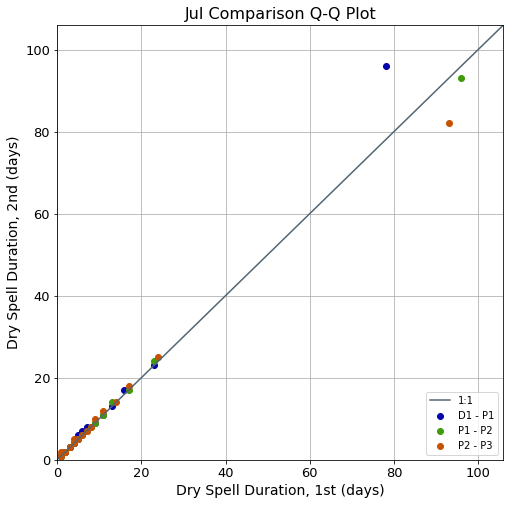

In [274]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JulD1Qs, JulP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JulP1Qs, JulP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JulP2Qs, JulP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

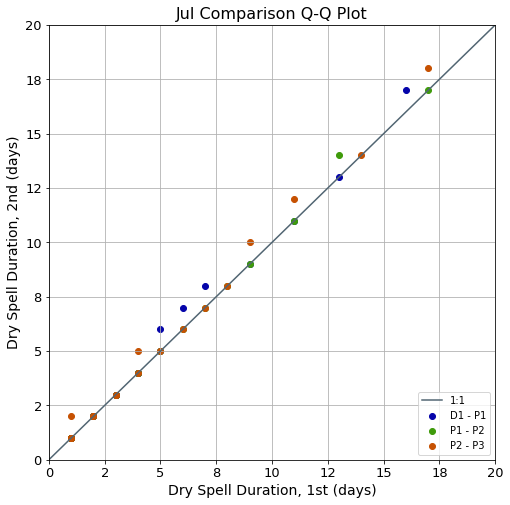

In [275]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JulD1Qs, JulP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JulP1Qs, JulP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JulP2Qs, JulP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

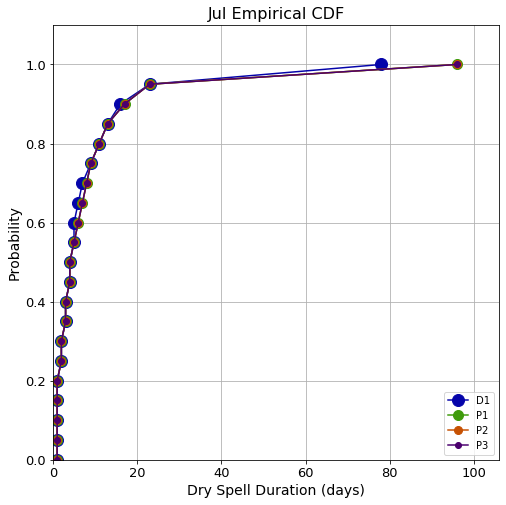

In [276]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JulD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( JulP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( JulP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( JulP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jul Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Aug

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [277]:
AugD1BSCI = sstats.bayes_mvs( np.array( AugD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [278]:
AugD1BSCI

(Mean(statistic=6.144145339557971, minmax=(6.134584136214686, 6.153706542901256)),
 Variance(statistic=36.15910617537112, minmax=(36.07779759175953, 36.240414758982716)),
 Std_dev(statistic=6.013244230477515, minmax=(6.006483438757175, 6.0200050221978545)))

In [279]:
AugD1BSCI[0][0], AugD1BSCI[0][1][0], AugD1BSCI[0][1][1]

(6.144145339557971, 6.134584136214686, 6.153706542901256)

In [280]:
SD1Mean.append( AugD1BSCI[0][0] )
SD1MeanMinCI.append( AugD1BSCI[0][1][0] )
SD1MeanMaxCI.append( AugD1BSCI[0][1][1] )
SD1Var.append( AugD1BSCI[1][0] )
SD1VarMinCI.append( AugD1BSCI[1][1][0] )
SD1VarMaxCI.append( AugD1BSCI[1][1][1] )
SD1Std.append( AugD1BSCI[2][0] )
SD1StdMinCI.append( AugD1BSCI[2][1][0] )
SD1StdMaxCI.append( AugD1BSCI[2][1][1] )

In [281]:
AugP1BSCI = sstats.bayes_mvs( np.array( AugP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [282]:
SP1Mean.append( AugP1BSCI[0][0] )
SP1MeanMinCI.append( AugP1BSCI[0][1][0] )
SP1MeanMaxCI.append( AugP1BSCI[0][1][1] )
SP1Var.append( AugP1BSCI[1][0] )
SP1VarMinCI.append( AugP1BSCI[1][1][0] )
SP1VarMaxCI.append( AugP1BSCI[1][1][1] )
SP1Std.append( AugP1BSCI[2][0] )
SP1StdMinCI.append( AugP1BSCI[2][1][0] )
SP1StdMaxCI.append( AugP1BSCI[2][1][1] )

In [283]:
AugP2BSCI = sstats.bayes_mvs( np.array( AugP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [284]:
SP2Mean.append( AugP2BSCI[0][0] )
SP2MeanMinCI.append( AugP2BSCI[0][1][0] )
SP2MeanMaxCI.append( AugP2BSCI[0][1][1] )
SP2Var.append( AugP2BSCI[1][0] )
SP2VarMinCI.append( AugP2BSCI[1][1][0] )
SP2VarMaxCI.append( AugP2BSCI[1][1][1] )
SP2Std.append( AugP2BSCI[2][0] )
SP2StdMinCI.append( AugP2BSCI[2][1][0] )
SP2StdMaxCI.append( AugP2BSCI[2][1][1] )

In [285]:
AugP3BSCI = sstats.bayes_mvs( np.array( AugP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [286]:
SP3Mean.append( AugP3BSCI[0][0] )
SP3MeanMinCI.append( AugP3BSCI[0][1][0] )
SP3MeanMaxCI.append( AugP3BSCI[0][1][1] )
SP3Var.append( AugP3BSCI[1][0] )
SP3VarMinCI.append( AugP3BSCI[1][1][0] )
SP3VarMaxCI.append( AugP3BSCI[1][1][1] )
SP3Std.append( AugP3BSCI[2][0] )
SP3StdMinCI.append( AugP3BSCI[2][1][0] )
SP3StdMaxCI.append( AugP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [287]:
AugTTD1toP1 = sstats.ttest_ind( np.array( AugD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( AugP1DF["Dry_Count"], dtype=np.int32 ) )

In [288]:
AugTTD1toP1Pval = AugTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % AugTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 0


In [289]:
AugTTP1toP2 = sstats.ttest_ind( np.array( AugP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( AugP2DF["Dry_Count"], dtype=np.int32 ) )

In [290]:
AugTTP1toP2Pval = AugTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % AugTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 8.98973e-39


In [291]:
AugTTP2toP3 = sstats.ttest_ind( np.array( AugP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( AugP3DF["Dry_Count"], dtype=np.int32 ) )

In [292]:
AugTTP2toP3Pval = AugTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % AugTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [293]:
AugMWUD1toP1 = sstats.mannwhitneyu( np.array( AugD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( AugP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [294]:
AugMWUD1toP1Pval = AugMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % AugMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 5.73244e-166


In [295]:
AugMWUP1toP2 = sstats.mannwhitneyu( np.array( AugP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( AugP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [296]:
AugMWUP1toP2Pval = AugMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % AugMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 1.49208e-16


In [297]:
AugMWUP2toP3 = sstats.mannwhitneyu( np.array( AugP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( AugP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [298]:
AugMWUP2toP3Pval = AugMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % AugMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 9.55097e-267


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [299]:
AugKWD1toP1 = sstats.kruskal( np.array( AugD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( AugP1DF["Dry_Count"], dtype=np.int32 ) )

In [300]:
AugKWD1toP1Pval = AugKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % AugKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [301]:
AugKWP1toP2 = sstats.kruskal( np.array( AugP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( AugP2DF["Dry_Count"], dtype=np.int32 ) )

In [302]:
AugKWP1toP2Pval = AugKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % AugKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [303]:
AugKWP2toP3 = sstats.kruskal( np.array( AugP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( AugP3DF["Dry_Count"], dtype=np.int32 ) )

In [304]:
AugKWP2toP3Pval = AugKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % AugKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [305]:
AugD1DF["Dry_Count"].median(), AugP1DF["Dry_Count"].median(), AugP2DF["Dry_Count"].median(), AugP3DF["Dry_Count"].median()

(4.0, 4.0, 4.0, 5.0)

#### Plots

In [306]:
AugD1Qs = AugD1DF["Dry_Count"].quantile(q=nCompQs)
AugP1Qs = AugP1DF["Dry_Count"].quantile(q=nCompQs)
AugP2Qs = AugP2DF["Dry_Count"].quantile(q=nCompQs)
AugP3Qs = AugP3DF["Dry_Count"].quantile(q=nCompQs)

In [307]:
maxQs = max( AugD1Qs.max(), AugP1Qs.max(), AugP2Qs.max(), AugP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

115.0

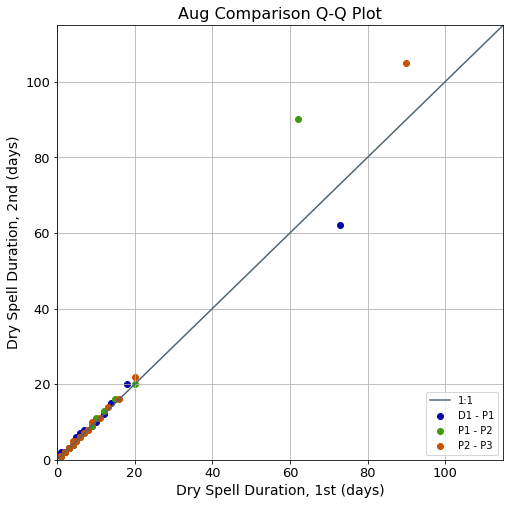

In [308]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AugD1Qs, AugP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( AugP1Qs, AugP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( AugP2Qs, AugP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

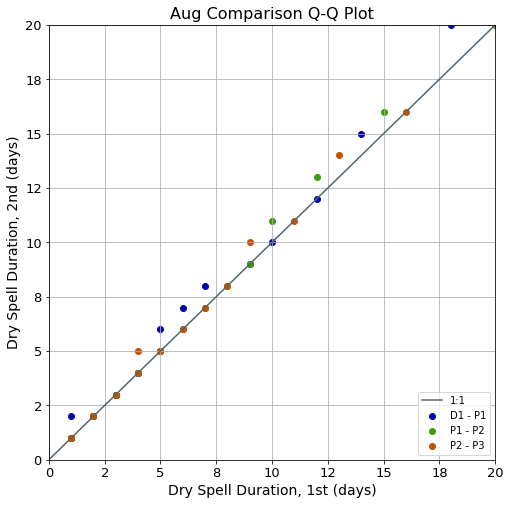

In [309]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AugD1Qs, AugP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( AugP1Qs, AugP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( AugP2Qs, AugP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

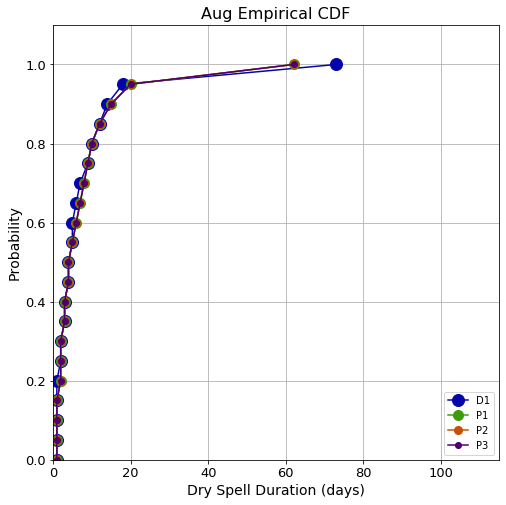

In [310]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AugD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( AugP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( AugP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( AugP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Aug Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Sep

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [311]:
SepD1BSCI = sstats.bayes_mvs( np.array( SepD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [312]:
SepD1BSCI

(Mean(statistic=5.0955968934758875, minmax=(5.087652018443967, 5.103541768507808)),
 Variance(statistic=28.313023440661095, minmax=(28.253238033335716, 28.372808847986473)),
 Std_dev(statistic=5.3209983499960885, minmax=(5.3153804749853375, 5.326616225006839)))

In [313]:
SepD1BSCI[0][0], SepD1BSCI[0][1][0], SepD1BSCI[0][1][1]

(5.0955968934758875, 5.087652018443967, 5.103541768507808)

In [314]:
SD1Mean.append( SepD1BSCI[0][0] )
SD1MeanMinCI.append( SepD1BSCI[0][1][0] )
SD1MeanMaxCI.append( SepD1BSCI[0][1][1] )
SD1Var.append( SepD1BSCI[1][0] )
SD1VarMinCI.append( SepD1BSCI[1][1][0] )
SD1VarMaxCI.append( SepD1BSCI[1][1][1] )
SD1Std.append( SepD1BSCI[2][0] )
SD1StdMinCI.append( SepD1BSCI[2][1][0] )
SD1StdMaxCI.append( SepD1BSCI[2][1][1] )

In [315]:
SepP1BSCI = sstats.bayes_mvs( np.array( SepP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [316]:
SP1Mean.append( SepP1BSCI[0][0] )
SP1MeanMinCI.append( SepP1BSCI[0][1][0] )
SP1MeanMaxCI.append( SepP1BSCI[0][1][1] )
SP1Var.append( SepP1BSCI[1][0] )
SP1VarMinCI.append( SepP1BSCI[1][1][0] )
SP1VarMaxCI.append( SepP1BSCI[1][1][1] )
SP1Std.append( SepP1BSCI[2][0] )
SP1StdMinCI.append( SepP1BSCI[2][1][0] )
SP1StdMaxCI.append( SepP1BSCI[2][1][1] )

In [317]:
SepP2BSCI = sstats.bayes_mvs( np.array( SepP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [318]:
SP2Mean.append( SepP2BSCI[0][0] )
SP2MeanMinCI.append( SepP2BSCI[0][1][0] )
SP2MeanMaxCI.append( SepP2BSCI[0][1][1] )
SP2Var.append( SepP2BSCI[1][0] )
SP2VarMinCI.append( SepP2BSCI[1][1][0] )
SP2VarMaxCI.append( SepP2BSCI[1][1][1] )
SP2Std.append( SepP2BSCI[2][0] )
SP2StdMinCI.append( SepP2BSCI[2][1][0] )
SP2StdMaxCI.append( SepP2BSCI[2][1][1] )

In [319]:
SepP3BSCI = sstats.bayes_mvs( np.array( SepP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [320]:
SP3Mean.append( SepP3BSCI[0][0] )
SP3MeanMinCI.append( SepP3BSCI[0][1][0] )
SP3MeanMaxCI.append( SepP3BSCI[0][1][1] )
SP3Var.append( SepP3BSCI[1][0] )
SP3VarMinCI.append( SepP3BSCI[1][1][0] )
SP3VarMaxCI.append( SepP3BSCI[1][1][1] )
SP3Std.append( SepP3BSCI[2][0] )
SP3StdMinCI.append( SepP3BSCI[2][1][0] )
SP3StdMaxCI.append( SepP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [321]:
SepTTD1toP1 = sstats.ttest_ind( np.array( SepD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( SepP1DF["Dry_Count"], dtype=np.int32 ) )

In [322]:
SepTTD1toP1Pval = SepTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % SepTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 3.41516e-182


In [323]:
SepTTP1toP2 = sstats.ttest_ind( np.array( SepP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( SepP2DF["Dry_Count"], dtype=np.int32 ) )

In [324]:
SepTTP1toP2Pval = SepTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % SepTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 9.92046e-56


In [325]:
SepTTP2toP3 = sstats.ttest_ind( np.array( SepP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( SepP3DF["Dry_Count"], dtype=np.int32 ) )

In [326]:
SepTTP2toP3Pval = SepTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % SepTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 5.26974e-89


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [327]:
SepMWUD1toP1 = sstats.mannwhitneyu( np.array( SepD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( SepP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [328]:
SepMWUD1toP1Pval = SepMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % SepMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 7.05989e-117


In [329]:
SepMWUP1toP2 = sstats.mannwhitneyu( np.array( SepP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( SepP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [330]:
SepMWUP1toP2Pval = SepMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % SepMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 0.35895


In [331]:
SepMWUP2toP3 = sstats.mannwhitneyu( np.array( SepP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( SepP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [332]:
SepMWUP2toP3Pval = SepMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % SepMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 3.40539e-27


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [333]:
SepKWD1toP1 = sstats.kruskal( np.array( SepD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( SepP1DF["Dry_Count"], dtype=np.int32 ) )

In [334]:
SepKWD1toP1Pval = SepKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % SepKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [335]:
SepKWP1toP2 = sstats.kruskal( np.array( SepP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( SepP2DF["Dry_Count"], dtype=np.int32 ) )

In [336]:
SepKWP1toP2Pval = SepKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % SepKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [337]:
SepKWP2toP3 = sstats.kruskal( np.array( SepP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( SepP3DF["Dry_Count"], dtype=np.int32 ) )

In [338]:
SepKWP2toP3Pval = SepKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % SepKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 0


In [339]:
SepD1DF["Dry_Count"].median(), SepP1DF["Dry_Count"].median(), SepP2DF["Dry_Count"].median(), SepP3DF["Dry_Count"].median()

(3.0, 3.0, 3.0, 3.0)

#### Plots

In [340]:
SepD1Qs = SepD1DF["Dry_Count"].quantile(q=nCompQs)
SepP1Qs = SepP1DF["Dry_Count"].quantile(q=nCompQs)
SepP2Qs = SepP2DF["Dry_Count"].quantile(q=nCompQs)
SepP3Qs = SepP3DF["Dry_Count"].quantile(q=nCompQs)

In [341]:
maxQs = max( SepD1Qs.max(), SepP1Qs.max(), SepP2Qs.max(), SepP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

187.0

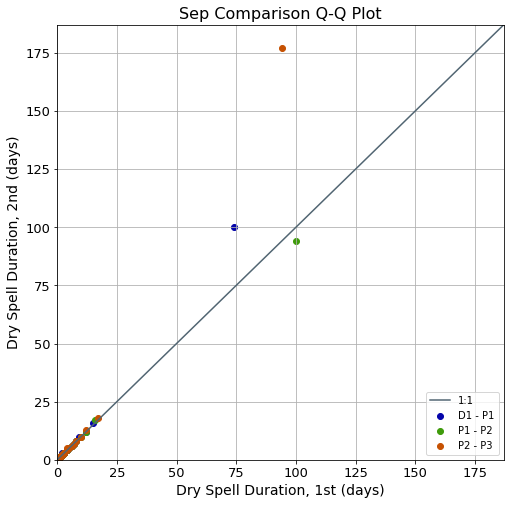

In [342]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( SepD1Qs, SepP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( SepP1Qs, SepP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( SepP2Qs, SepP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

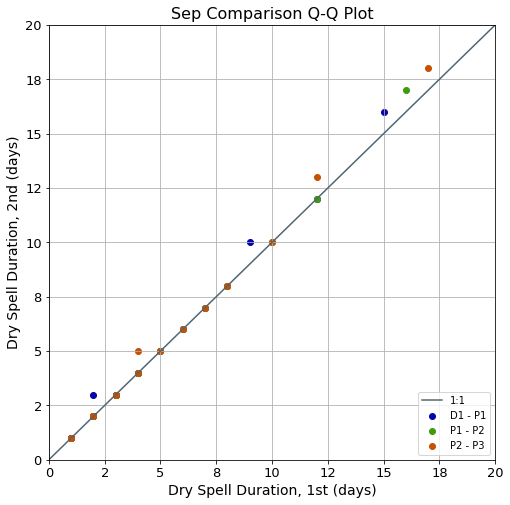

In [343]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( SepD1Qs, SepP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( SepP1Qs, SepP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( SepP2Qs, SepP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

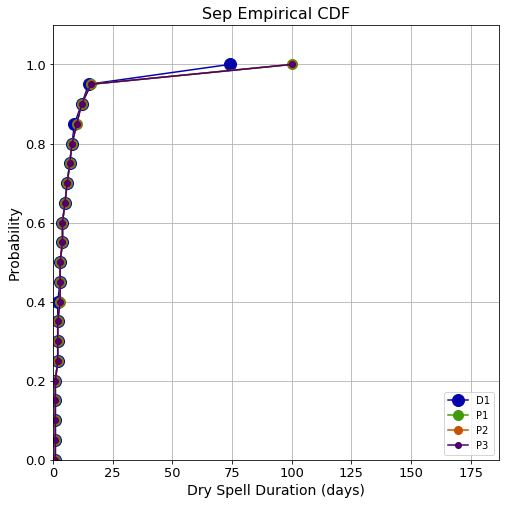

In [344]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( SepD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( SepP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( SepP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( SepP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Sep Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Oct

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [345]:
OctD1BSCI = sstats.bayes_mvs( np.array( OctD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [346]:
OctD1BSCI

(Mean(statistic=6.2332275080713115, minmax=(6.222886729537407, 6.243568286605216)),
 Variance(statistic=47.04551697045582, minmax=(46.94521086755713, 47.145823073354514)),
 Std_dev(statistic=6.858973463314742, minmax=(6.8516614286906705, 6.866285497938813)))

In [347]:
OctD1BSCI[0][0], OctD1BSCI[0][1][0], OctD1BSCI[0][1][1]

(6.2332275080713115, 6.222886729537407, 6.243568286605216)

In [348]:
SD1Mean.append( OctD1BSCI[0][0] )
SD1MeanMinCI.append( OctD1BSCI[0][1][0] )
SD1MeanMaxCI.append( OctD1BSCI[0][1][1] )
SD1Var.append( OctD1BSCI[1][0] )
SD1VarMinCI.append( OctD1BSCI[1][1][0] )
SD1VarMaxCI.append( OctD1BSCI[1][1][1] )
SD1Std.append( OctD1BSCI[2][0] )
SD1StdMinCI.append( OctD1BSCI[2][1][0] )
SD1StdMaxCI.append( OctD1BSCI[2][1][1] )

In [349]:
OctP1BSCI = sstats.bayes_mvs( np.array( OctP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [350]:
SP1Mean.append( OctP1BSCI[0][0] )
SP1MeanMinCI.append( OctP1BSCI[0][1][0] )
SP1MeanMaxCI.append( OctP1BSCI[0][1][1] )
SP1Var.append( OctP1BSCI[1][0] )
SP1VarMinCI.append( OctP1BSCI[1][1][0] )
SP1VarMaxCI.append( OctP1BSCI[1][1][1] )
SP1Std.append( OctP1BSCI[2][0] )
SP1StdMinCI.append( OctP1BSCI[2][1][0] )
SP1StdMaxCI.append( OctP1BSCI[2][1][1] )

In [351]:
OctP2BSCI = sstats.bayes_mvs( np.array( OctP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [352]:
SP2Mean.append( OctP2BSCI[0][0] )
SP2MeanMinCI.append( OctP2BSCI[0][1][0] )
SP2MeanMaxCI.append( OctP2BSCI[0][1][1] )
SP2Var.append( OctP2BSCI[1][0] )
SP2VarMinCI.append( OctP2BSCI[1][1][0] )
SP2VarMaxCI.append( OctP2BSCI[1][1][1] )
SP2Std.append( OctP2BSCI[2][0] )
SP2StdMinCI.append( OctP2BSCI[2][1][0] )
SP2StdMaxCI.append( OctP2BSCI[2][1][1] )

In [353]:
OctP3BSCI = sstats.bayes_mvs( np.array( OctP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [354]:
SP3Mean.append( OctP3BSCI[0][0] )
SP3MeanMinCI.append( OctP3BSCI[0][1][0] )
SP3MeanMaxCI.append( OctP3BSCI[0][1][1] )
SP3Var.append( OctP3BSCI[1][0] )
SP3VarMinCI.append( OctP3BSCI[1][1][0] )
SP3VarMaxCI.append( OctP3BSCI[1][1][1] )
SP3Std.append( OctP3BSCI[2][0] )
SP3StdMinCI.append( OctP3BSCI[2][1][0] )
SP3StdMaxCI.append( OctP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [355]:
OctTTD1toP1 = sstats.ttest_ind( np.array( OctD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( OctP1DF["Dry_Count"], dtype=np.int32 ) )

In [356]:
OctTTD1toP1Pval = OctTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % OctTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 0


In [357]:
OctTTP1toP2 = sstats.ttest_ind( np.array( OctP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( OctP2DF["Dry_Count"], dtype=np.int32 ) )

In [358]:
OctTTP1toP2Pval = OctTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % OctTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 1.01961e-125


In [359]:
OctTTP2toP3 = sstats.ttest_ind( np.array( OctP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( OctP3DF["Dry_Count"], dtype=np.int32 ) )

In [360]:
OctTTP2toP3Pval = OctTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % OctTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 4.36206e-306


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [361]:
OctMWUD1toP1 = sstats.mannwhitneyu( np.array( OctD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( OctP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [362]:
OctMWUD1toP1Pval = OctMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % OctMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 0


In [363]:
OctMWUP1toP2 = sstats.mannwhitneyu( np.array( OctP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( OctP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [364]:
OctMWUP1toP2Pval = OctMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % OctMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 1.24485e-10


In [365]:
OctMWUP2toP3 = sstats.mannwhitneyu( np.array( OctP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( OctP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [366]:
OctMWUP2toP3Pval = OctMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % OctMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 1.5272e-200


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [367]:
OctKWD1toP1 = sstats.kruskal( np.array( OctD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( OctP1DF["Dry_Count"], dtype=np.int32 ) )

In [368]:
OctKWD1toP1Pval = OctKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % OctKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [369]:
OctKWP1toP2 = sstats.kruskal( np.array( OctP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( OctP2DF["Dry_Count"], dtype=np.int32 ) )

In [370]:
OctKWP1toP2Pval = OctKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % OctKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [371]:
OctKWP2toP3 = sstats.kruskal( np.array( OctP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( OctP3DF["Dry_Count"], dtype=np.int32 ) )

In [372]:
OctKWP2toP3Pval = OctKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % OctKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 0


In [373]:
OctD1DF["Dry_Count"].median(), OctP1DF["Dry_Count"].median(), OctP2DF["Dry_Count"].median(), OctP3DF["Dry_Count"].median()

(4.0, 4.0, 4.0, 4.0)

#### Plots

In [374]:
OctD1Qs = OctD1DF["Dry_Count"].quantile(q=nCompQs)
OctP1Qs = OctP1DF["Dry_Count"].quantile(q=nCompQs)
OctP2Qs = OctP2DF["Dry_Count"].quantile(q=nCompQs)
OctP3Qs = OctP3DF["Dry_Count"].quantile(q=nCompQs)

In [375]:
maxQs = max( OctD1Qs.max(), OctP1Qs.max(), OctP2Qs.max(), OctP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

179.0

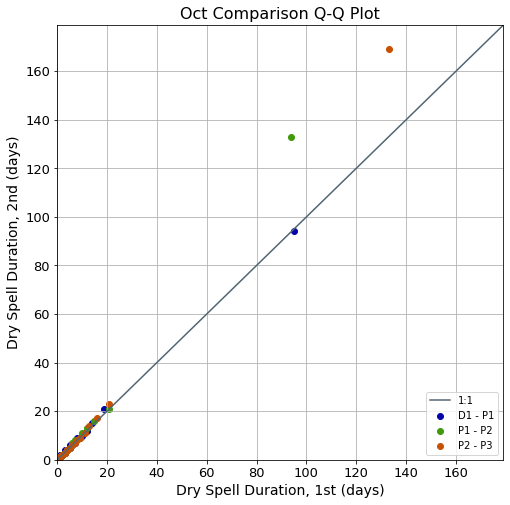

In [376]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( OctD1Qs, OctP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( OctP1Qs, OctP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( OctP2Qs, OctP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

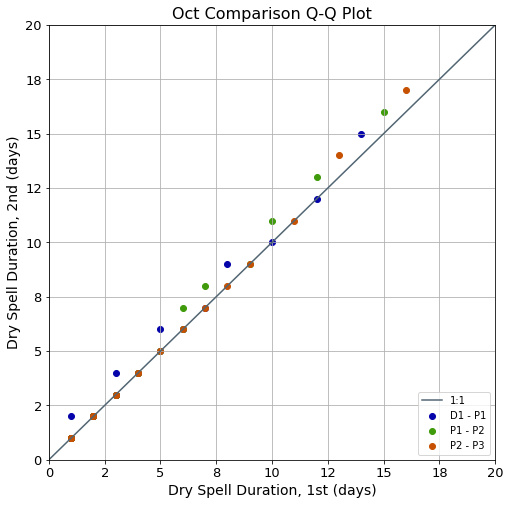

In [377]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( OctD1Qs, OctP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( OctP1Qs, OctP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( OctP2Qs, OctP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

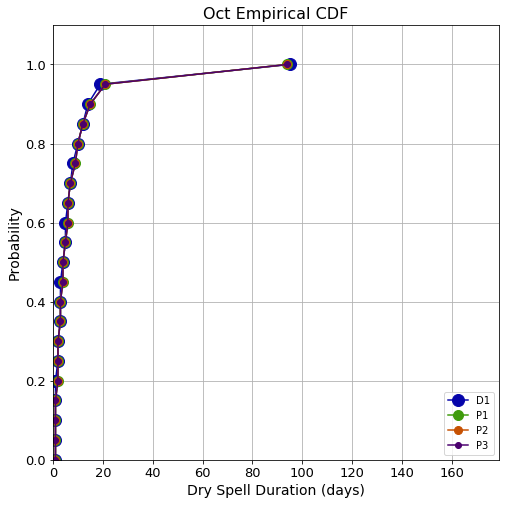

In [378]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( OctD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( OctP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( OctP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( OctP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Oct Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Nov

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [379]:
NovD1BSCI = sstats.bayes_mvs( np.array( NovD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [380]:
NovD1BSCI

(Mean(statistic=6.536863766270589, minmax=(6.525682540307428, 6.548044992233749)),
 Variance(statistic=53.12963332730311, minmax=(53.01437486229031, 53.24489179231591)),
 Std_dev(statistic=7.289007705257493, minmax=(7.281101384556963, 7.296914025958023)))

In [381]:
NovD1BSCI[0][0], NovD1BSCI[0][1][0], NovD1BSCI[0][1][1]

(6.536863766270589, 6.525682540307428, 6.548044992233749)

In [382]:
SD1Mean.append( NovD1BSCI[0][0] )
SD1MeanMinCI.append( NovD1BSCI[0][1][0] )
SD1MeanMaxCI.append( NovD1BSCI[0][1][1] )
SD1Var.append( NovD1BSCI[1][0] )
SD1VarMinCI.append( NovD1BSCI[1][1][0] )
SD1VarMaxCI.append( NovD1BSCI[1][1][1] )
SD1Std.append( NovD1BSCI[2][0] )
SD1StdMinCI.append( NovD1BSCI[2][1][0] )
SD1StdMaxCI.append( NovD1BSCI[2][1][1] )

In [383]:
NovP1BSCI = sstats.bayes_mvs( np.array( NovP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [384]:
SP1Mean.append( NovP1BSCI[0][0] )
SP1MeanMinCI.append( NovP1BSCI[0][1][0] )
SP1MeanMaxCI.append( NovP1BSCI[0][1][1] )
SP1Var.append( NovP1BSCI[1][0] )
SP1VarMinCI.append( NovP1BSCI[1][1][0] )
SP1VarMaxCI.append( NovP1BSCI[1][1][1] )
SP1Std.append( NovP1BSCI[2][0] )
SP1StdMinCI.append( NovP1BSCI[2][1][0] )
SP1StdMaxCI.append( NovP1BSCI[2][1][1] )

In [385]:
NovP2BSCI = sstats.bayes_mvs( np.array( NovP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [386]:
SP2Mean.append( NovP2BSCI[0][0] )
SP2MeanMinCI.append( NovP2BSCI[0][1][0] )
SP2MeanMaxCI.append( NovP2BSCI[0][1][1] )
SP2Var.append( NovP2BSCI[1][0] )
SP2VarMinCI.append( NovP2BSCI[1][1][0] )
SP2VarMaxCI.append( NovP2BSCI[1][1][1] )
SP2Std.append( NovP2BSCI[2][0] )
SP2StdMinCI.append( NovP2BSCI[2][1][0] )
SP2StdMaxCI.append( NovP2BSCI[2][1][1] )

In [387]:
NovP3BSCI = sstats.bayes_mvs( np.array( NovP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [388]:
SP3Mean.append( NovP3BSCI[0][0] )
SP3MeanMinCI.append( NovP3BSCI[0][1][0] )
SP3MeanMaxCI.append( NovP3BSCI[0][1][1] )
SP3Var.append( NovP3BSCI[1][0] )
SP3VarMinCI.append( NovP3BSCI[1][1][0] )
SP3VarMaxCI.append( NovP3BSCI[1][1][1] )
SP3Std.append( NovP3BSCI[2][0] )
SP3StdMinCI.append( NovP3BSCI[2][1][0] )
SP3StdMaxCI.append( NovP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [389]:
NovTTD1toP1 = sstats.ttest_ind( np.array( NovD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( NovP1DF["Dry_Count"], dtype=np.int32 ) )

In [390]:
NovTTD1toP1Pval = NovTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % NovTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 0


In [391]:
NovTTP1toP2 = sstats.ttest_ind( np.array( NovP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( NovP2DF["Dry_Count"], dtype=np.int32 ) )

In [392]:
NovTTP1toP2Pval = NovTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % NovTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 7.49351e-62


In [393]:
NovTTP2toP3 = sstats.ttest_ind( np.array( NovP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( NovP3DF["Dry_Count"], dtype=np.int32 ) )

In [394]:
NovTTP2toP3Pval = NovTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % NovTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 7.26284e-145


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [395]:
NovMWUD1toP1 = sstats.mannwhitneyu( np.array( NovD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( NovP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [396]:
NovMWUD1toP1Pval = NovMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % NovMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 0


In [397]:
NovMWUP1toP2 = sstats.mannwhitneyu( np.array( NovP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( NovP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [398]:
NovMWUP1toP2Pval = NovMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % NovMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 0.29428


In [399]:
NovMWUP2toP3 = sstats.mannwhitneyu( np.array( NovP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( NovP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [400]:
NovMWUP2toP3Pval = NovMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % NovMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 2.8695e-81


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [401]:
NovKWD1toP1 = sstats.kruskal( np.array( NovD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( NovP1DF["Dry_Count"], dtype=np.int32 ) )

In [402]:
NovKWD1toP1Pval = NovKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % NovKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [403]:
NovKWP1toP2 = sstats.kruskal( np.array( NovP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( NovP2DF["Dry_Count"], dtype=np.int32 ) )

In [404]:
NovKWP1toP2Pval = NovKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % NovKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 1


In [405]:
NovKWP2toP3 = sstats.kruskal( np.array( NovP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( NovP3DF["Dry_Count"], dtype=np.int32 ) )

In [406]:
NovKWP2toP3Pval = NovKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % NovKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [407]:
NovD1DF["Dry_Count"].median(), NovP1DF["Dry_Count"].median(), NovP2DF["Dry_Count"].median(), NovP3DF["Dry_Count"].median()

(4.0, 4.0, 4.0, 5.0)

#### Plots

In [408]:
NovD1Qs = NovD1DF["Dry_Count"].quantile(q=nCompQs)
NovP1Qs = NovP1DF["Dry_Count"].quantile(q=nCompQs)
NovP2Qs = NovP2DF["Dry_Count"].quantile(q=nCompQs)
NovP3Qs = NovP3DF["Dry_Count"].quantile(q=nCompQs)

In [409]:
maxQs = max( NovD1Qs.max(), NovP1Qs.max(), NovP2Qs.max(), NovP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

197.0

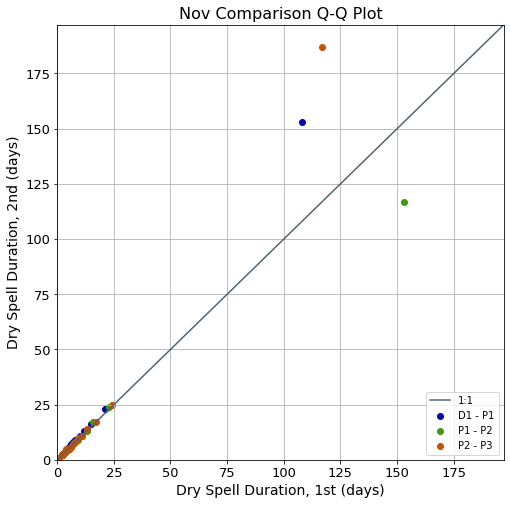

In [410]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( NovD1Qs, NovP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( NovP1Qs, NovP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( NovP2Qs, NovP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

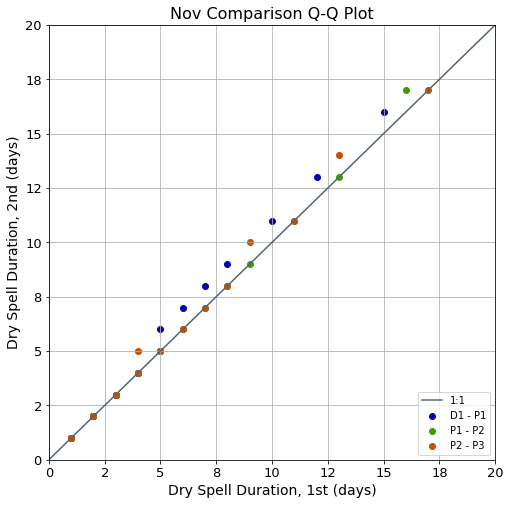

In [411]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( NovD1Qs, NovP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( NovP1Qs, NovP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( NovP2Qs, NovP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

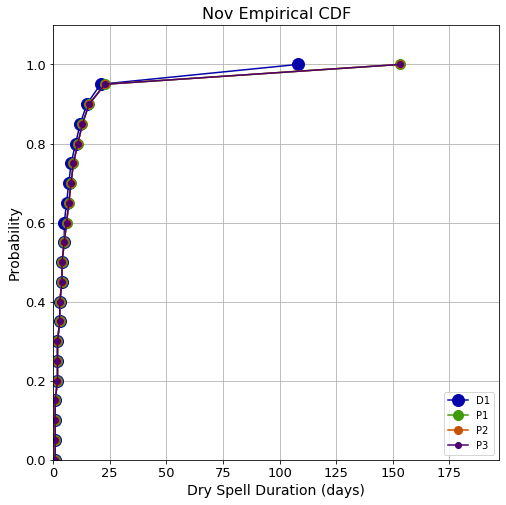

In [412]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( NovD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( NovP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( NovP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( NovP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Nov Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Dec

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [413]:
DecD1BSCI = sstats.bayes_mvs( np.array( DecD1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [414]:
DecD1BSCI

(Mean(statistic=7.3864545310851595, minmax=(7.374116358820699, 7.39879270334962)),
 Variance(statistic=61.2272413391424, minmax=(61.09070816920937, 61.363774509075434)),
 Std_dev(statistic=7.824783788651441, minmax=(7.816059383375793, 7.833508193927089)))

In [415]:
DecD1BSCI[0][0], DecD1BSCI[0][1][0], DecD1BSCI[0][1][1]

(7.3864545310851595, 7.374116358820699, 7.39879270334962)

In [416]:
SD1Mean.append( DecD1BSCI[0][0] )
SD1MeanMinCI.append( DecD1BSCI[0][1][0] )
SD1MeanMaxCI.append( DecD1BSCI[0][1][1] )
SD1Var.append( DecD1BSCI[1][0] )
SD1VarMinCI.append( DecD1BSCI[1][1][0] )
SD1VarMaxCI.append( DecD1BSCI[1][1][1] )
SD1Std.append( DecD1BSCI[2][0] )
SD1StdMinCI.append( DecD1BSCI[2][1][0] )
SD1StdMaxCI.append( DecD1BSCI[2][1][1] )

In [417]:
DecP1BSCI = sstats.bayes_mvs( np.array( DecP1DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [418]:
SP1Mean.append( DecP1BSCI[0][0] )
SP1MeanMinCI.append( DecP1BSCI[0][1][0] )
SP1MeanMaxCI.append( DecP1BSCI[0][1][1] )
SP1Var.append( DecP1BSCI[1][0] )
SP1VarMinCI.append( DecP1BSCI[1][1][0] )
SP1VarMaxCI.append( DecP1BSCI[1][1][1] )
SP1Std.append( DecP1BSCI[2][0] )
SP1StdMinCI.append( DecP1BSCI[2][1][0] )
SP1StdMaxCI.append( DecP1BSCI[2][1][1] )

In [419]:
DecP2BSCI = sstats.bayes_mvs( np.array( DecP2DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [420]:
SP2Mean.append( DecP2BSCI[0][0] )
SP2MeanMinCI.append( DecP2BSCI[0][1][0] )
SP2MeanMaxCI.append( DecP2BSCI[0][1][1] )
SP2Var.append( DecP2BSCI[1][0] )
SP2VarMinCI.append( DecP2BSCI[1][1][0] )
SP2VarMaxCI.append( DecP2BSCI[1][1][1] )
SP2Std.append( DecP2BSCI[2][0] )
SP2StdMinCI.append( DecP2BSCI[2][1][0] )
SP2StdMaxCI.append( DecP2BSCI[2][1][1] )

In [421]:
DecP3BSCI = sstats.bayes_mvs( np.array( DecP3DF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [422]:
SP3Mean.append( DecP3BSCI[0][0] )
SP3MeanMinCI.append( DecP3BSCI[0][1][0] )
SP3MeanMaxCI.append( DecP3BSCI[0][1][1] )
SP3Var.append( DecP3BSCI[1][0] )
SP3VarMinCI.append( DecP3BSCI[1][1][0] )
SP3VarMaxCI.append( DecP3BSCI[1][1][1] )
SP3Std.append( DecP3BSCI[2][0] )
SP3StdMinCI.append( DecP3BSCI[2][1][0] )
SP3StdMaxCI.append( DecP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [423]:
DecTTD1toP1 = sstats.ttest_ind( np.array( DecD1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( DecP1DF["Dry_Count"], dtype=np.int32 ) )

In [424]:
DecTTD1toP1Pval = DecTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % DecTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 0


In [425]:
DecTTP1toP2 = sstats.ttest_ind( np.array( DecP1DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( DecP2DF["Dry_Count"], dtype=np.int32 ) )

In [426]:
DecTTP1toP2Pval = DecTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % DecTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 1.03971e-48


In [427]:
DecTTP2toP3 = sstats.ttest_ind( np.array( DecP2DF["Dry_Count"], dtype=np.int32 ), 
                                np.array( DecP3DF["Dry_Count"], dtype=np.int32 ) )

In [428]:
DecTTP2toP3Pval = DecTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % DecTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 5.85175e-148


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [429]:
DecMWUD1toP1 = sstats.mannwhitneyu( np.array( DecD1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( DecP1DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [430]:
DecMWUD1toP1Pval = DecMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % DecMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 0


In [431]:
DecMWUP1toP2 = sstats.mannwhitneyu( np.array( DecP1DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( DecP2DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [432]:
DecMWUP1toP2Pval = DecMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % DecMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 1.22786e-32


In [433]:
DecMWUP2toP3 = sstats.mannwhitneyu( np.array( DecP2DF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( DecP3DF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [434]:
DecMWUP2toP3Pval = DecMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % DecMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 5.77574e-78


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [435]:
DecKWD1toP1 = sstats.kruskal( np.array( DecD1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( DecP1DF["Dry_Count"], dtype=np.int32 ) )

In [436]:
DecKWD1toP1Pval = DecKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % DecKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [437]:
DecKWP1toP2 = sstats.kruskal( np.array( DecP1DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( DecP2DF["Dry_Count"], dtype=np.int32 ) )

In [438]:
DecKWP1toP2Pval = DecKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % DecKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [439]:
DecKWP2toP3 = sstats.kruskal( np.array( DecP2DF["Dry_Count"], dtype=np.int32 ), 
                              np.array( DecP3DF["Dry_Count"], dtype=np.int32 ) )

In [440]:
DecKWP2toP3Pval = DecKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % DecKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [441]:
DecD1DF["Dry_Count"].median(), DecP1DF["Dry_Count"].median(), DecP2DF["Dry_Count"].median(), DecP3DF["Dry_Count"].median()

(5.0, 5.0, 5.0, 5.0)

#### Plots

In [442]:
DecD1Qs = DecD1DF["Dry_Count"].quantile(q=nCompQs)
DecP1Qs = DecP1DF["Dry_Count"].quantile(q=nCompQs)
DecP2Qs = DecP2DF["Dry_Count"].quantile(q=nCompQs)
DecP3Qs = DecP3DF["Dry_Count"].quantile(q=nCompQs)

In [443]:
maxQs = max( DecD1Qs.max(), DecP1Qs.max(), DecP2Qs.max(), DecP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

147.0

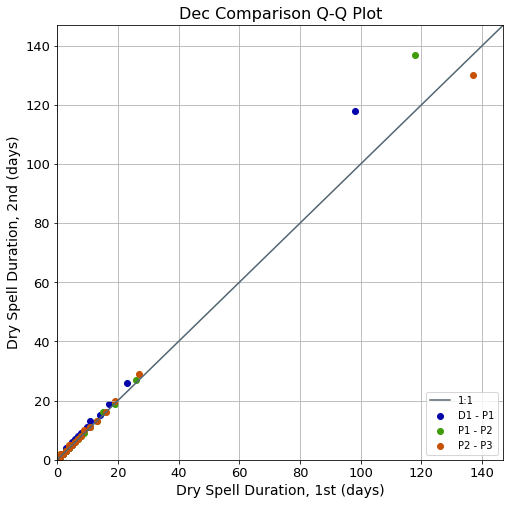

In [444]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DecD1Qs, DecP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( DecP1Qs, DecP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( DecP2Qs, DecP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

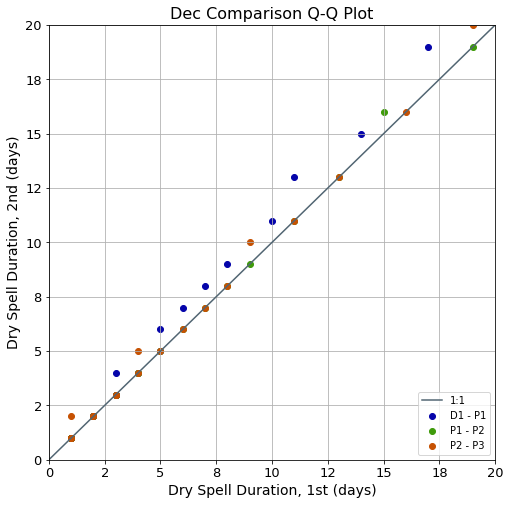

In [445]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DecD1Qs, DecP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( DecP1Qs, DecP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( DecP2Qs, DecP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

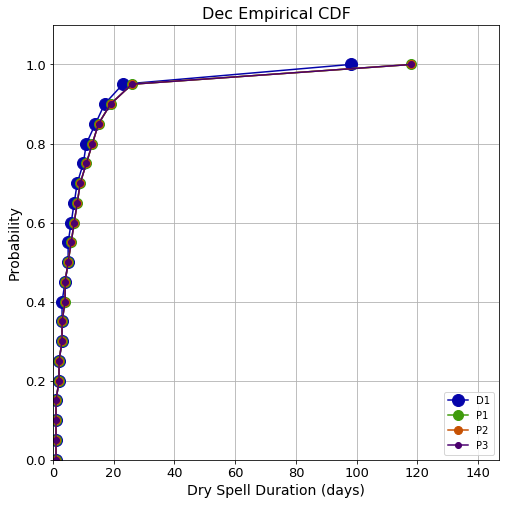

In [446]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( DecD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( DecP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( DecP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( DecP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Dec Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Final Collations, Plots, and Outputs

In [447]:
DataDict = { "Min CI Mean" : np.array( SD1MeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SD1Mean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SD1MeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SD1VarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SD1Var, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SD1VarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SD1StdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SD1Std, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SD1StdMaxCI, dtype=np.float32 ), #8
}
D1BayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [448]:
BSCIHds = list( D1BayStatsCIDF.columns )

In [449]:
display( HTML( D1BayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,7.588606,7.600758,7.612910,56.193562,56.322536,56.451515,7.496242,7.504834,7.513427
2,6.995934,7.007583,7.019232,51.113220,51.231133,51.349049,7.149355,7.157593,7.165830
3,6.977912,6.988409,6.998906,44.601753,44.701004,44.800259,6.678459,6.685881,6.693304
4,5.130095,5.137130,5.144166,21.992319,22.039028,22.085739,4.689600,4.694574,4.699549
5,4.135793,4.141581,4.147368,18.037533,18.072329,18.107126,4.247064,4.251156,4.255249
6,5.515992,5.525916,5.535839,46.317726,46.413334,46.508945,6.805717,6.812733,6.819750
7,6.801251,6.813155,6.825059,54.699200,54.823845,54.948494,7.395895,7.404313,7.412730
8,6.134584,6.144145,6.153707,36.077797,36.159107,36.240414,6.006484,6.013244,6.020005
9,5.087652,5.095597,5.103542,28.253239,28.313023,28.372808,5.315381,5.320998,5.326616
10,6.222887,6.233228,6.243568,46.945210,47.045517,47.145824,6.851661,6.858974,6.866285


In [450]:
DataDict = { "Min CI Mean" : np.array( SP1MeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SP1Mean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SP1MeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SP1VarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SP1Var, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SP1VarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SP1StdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SP1Std, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SP1StdMaxCI, dtype=np.float32 ), #8
}
P1BayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [451]:
display( HTML( P1BayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,8.365788,8.380219,8.394650,72.575989,72.750053,72.924118,8.519160,8.529365,8.539568
2,7.150410,7.162631,7.174852,53.910439,54.037487,54.164539,7.342378,7.351019,7.359661
3,7.141296,7.152277,7.163257,47.764313,47.871758,47.979202,6.911177,6.918942,6.926706
4,5.314953,5.322500,5.330046,24.857277,24.910542,24.963806,4.985710,4.991046,4.996382
5,4.343956,4.350159,4.356362,20.230303,20.269798,20.309296,4.497813,4.502199,4.506586
6,5.863607,5.874712,5.885818,55.872513,55.990025,56.107540,7.474796,7.482648,7.490500
7,7.138524,7.151573,7.164621,63.322559,63.469574,63.616592,7.957552,7.966779,7.976007
8,6.483181,6.493649,6.504117,41.729748,41.825489,41.921230,6.459861,6.467263,6.474665
9,5.290270,5.298741,5.307212,31.509850,31.577169,31.644487,5.613367,5.619357,5.625347
10,6.595473,6.606449,6.617424,50.627342,50.737904,50.848469,7.115294,7.123055,7.130816


In [452]:
DataDict = { "Min CI Mean" : np.array( SP2MeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SP2Mean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SP2MeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SP2VarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SP2Var, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SP2VarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SP2StdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SP2Std, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SP2StdMaxCI, dtype=np.float32 ), #8
}
P2BayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [453]:
display( HTML( P2BayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,8.711021,8.726610,8.742200,82.371658,82.571999,82.772331,9.075891,9.086913,9.097937
2,7.465143,7.478554,7.491965,63.058929,63.209717,63.360500,7.940971,7.950454,7.959937
3,7.706392,7.718704,7.731016,57.502087,57.634270,57.766457,7.583018,7.591724,7.600430
4,5.444771,5.452850,5.460928,27.482138,27.542097,27.602057,5.242344,5.248056,5.253769
5,4.589787,4.596750,4.603714,24.628901,24.677824,24.726746,4.962754,4.967678,4.972602
6,6.077649,6.089344,6.101038,60.308968,60.437542,60.566120,7.765889,7.774159,7.782428
7,7.287475,7.301216,7.314958,69.744263,69.906754,70.069237,8.351309,8.361026,8.370743
8,6.602278,6.613158,6.624039,44.032410,44.134632,44.236855,6.635696,6.643390,6.651083
9,5.408867,5.418038,5.427209,36.292641,36.370861,36.449078,6.024341,6.030826,6.037311
10,6.829239,6.841150,6.853060,58.517384,58.646378,58.775372,7.649670,7.658092,7.666514


In [454]:
DataDict = { "Min CI Mean" : np.array( SP3MeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SP3Mean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SP3MeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SP3VarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SP3Var, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SP3VarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SP3StdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SP3Std, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SP3StdMaxCI, dtype=np.float32 ), #8
}
P3BayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [455]:
display( HTML( P3BayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,8.854487,8.870689,8.886891,83.774742,83.984718,84.194702,9.152862,9.164318,9.175775
2,7.885509,7.900725,7.915940,75.989265,76.177071,76.364883,8.717189,8.727948,8.738707
3,7.674446,7.687056,7.699667,57.731201,57.866867,58.002537,7.598110,7.607028,7.615945
4,5.601400,5.609954,5.618507,29.332846,29.398436,29.464024,5.415984,5.422032,5.428081
5,4.764091,4.771671,4.779252,27.815163,27.871759,27.928356,5.274011,5.279371,5.284731
6,6.349761,6.362480,6.375200,67.174187,67.321777,67.469368,8.195991,8.204985,8.213979
7,7.621280,7.636244,7.651208,77.423714,77.610153,77.796585,8.799081,8.809662,8.820244
8,6.999928,7.011906,7.023884,49.241249,49.360264,49.479275,7.017216,7.025686,7.034156
9,5.573071,5.583110,5.593151,41.017548,41.108585,41.199623,6.404498,6.411598,6.418697
10,7.236726,7.250289,7.263853,70.938751,71.100494,71.262238,8.422521,8.432111,8.441702


In [456]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DryDayComp_LOCAProjs.xlsx" ) )
with pd.ExcelWriter( OutFiler ) as writer:
    D1BayStatsCIDF.to_excel( writer, sheet_name="LOCA_D1_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    P1BayStatsCIDF.to_excel( writer, sheet_name="LOCA_P1_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    P2BayStatsCIDF.to_excel( writer, sheet_name="LOCA_P2_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    P3BayStatsCIDF.to_excel( writer, sheet_name="LOCA_P3_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )    

Plot the monthly confidence intervals with statistic

In [457]:
D1MeanCI = np.append( np.stack( [np.array(D1BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(D1BayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D1BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(D1BayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D1MeanCI = np.vstack( [D1MeanCI[:,:], D1MeanCI[0,:]] )

In [458]:
P1MeanCI = np.append( np.stack( [np.array(P1BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P1BayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P1BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P1BayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P1MeanCI = np.vstack( [P1MeanCI[:,:], P1MeanCI[0,:]] )

In [459]:
P2MeanCI = np.append( np.stack( [np.array(P2BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P2BayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P2BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P2BayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P2MeanCI = np.vstack( [P2MeanCI[:,:], P2MeanCI[0,:]] )

In [460]:
P3MeanCI = np.append( np.stack( [np.array(P3BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P3BayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P3BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P3BayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P3MeanCI = np.vstack( [P3MeanCI[:,:], P3MeanCI[0,:]] )

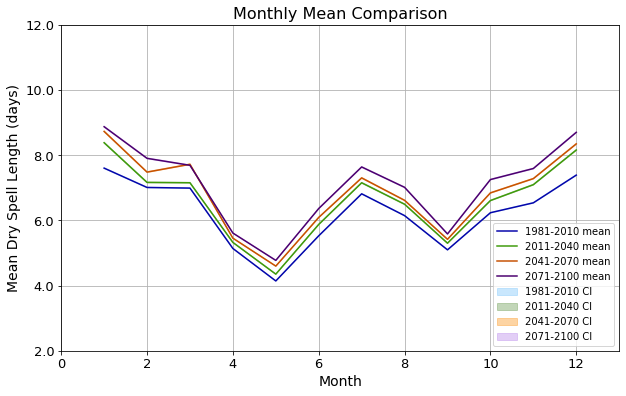

In [463]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D1BayStatsCIDF.index, D1BayStatsCIDF[BSCIHds[1]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010 mean" )
ax11.fill( D1MeanCI[:,0], D1MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 CI")
ax11.plot( P1BayStatsCIDF.index, P1BayStatsCIDF[BSCIHds[1]], color="xkcd:grass green", 
           linestyle="-", label="2011-2040 mean" )
ax11.fill( P1MeanCI[:,0], P1MeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="2011-2040 CI")
ax11.plot( P2BayStatsCIDF.index, P2BayStatsCIDF[BSCIHds[1]], color="xkcd:dark orange", 
           linestyle="-", label="2041-2070 mean" )
ax11.fill( P2MeanCI[:,0], P2MeanCI[:,1], color="xkcd:light orange", alpha=0.5, 
           label="2041-2070 CI")
ax11.plot( P3BayStatsCIDF.index, P3BayStatsCIDF[BSCIHds[1]], color="xkcd:royal purple", 
           linestyle="-", label="2071-2100 mean" )
ax11.fill( P3MeanCI[:,0], P3MeanCI[:,1], color="xkcd:lavender", alpha=0.5, 
           label="2071-2100 CI")
ax11.set_title('Monthly Mean Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Dry Spell Length (days)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

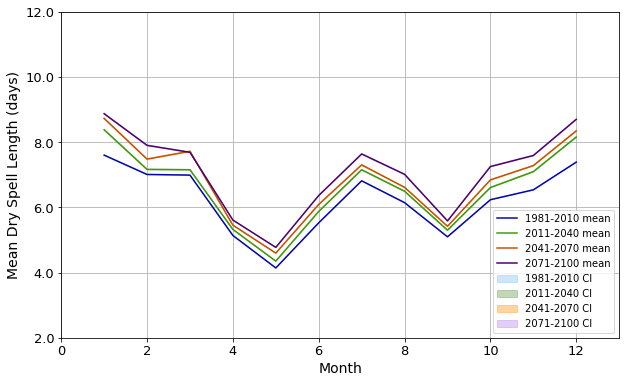

In [465]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D1BayStatsCIDF.index, D1BayStatsCIDF[BSCIHds[1]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010 mean" )
ax11.fill( D1MeanCI[:,0], D1MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 CI")
ax11.plot( P1BayStatsCIDF.index, P1BayStatsCIDF[BSCIHds[1]], color="xkcd:grass green", 
           linestyle="-", label="2011-2040 mean" )
ax11.fill( P1MeanCI[:,0], P1MeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="2011-2040 CI")
ax11.plot( P2BayStatsCIDF.index, P2BayStatsCIDF[BSCIHds[1]], color="xkcd:dark orange", 
           linestyle="-", label="2041-2070 mean" )
ax11.fill( P2MeanCI[:,0], P2MeanCI[:,1], color="xkcd:light orange", alpha=0.5, 
           label="2041-2070 CI")
ax11.plot( P3BayStatsCIDF.index, P3BayStatsCIDF[BSCIHds[1]], color="xkcd:royal purple", 
           linestyle="-", label="2071-2100 mean" )
ax11.fill( P3MeanCI[:,0], P3MeanCI[:,1], color="xkcd:lavender", alpha=0.5, 
           label="2071-2100 CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Dry Spell Length (days)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [466]:
D1VarCI = np.append( np.stack( [np.array(D1BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(D1BayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D1BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(D1BayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D1VarCI = np.vstack( [D1VarCI[:,:], D1VarCI[0,:]] )

In [467]:
P1VarCI = np.append( np.stack( [np.array(P1BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P1BayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P1BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P1BayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P1VarCI = np.vstack( [P1VarCI[:,:], P1VarCI[0,:]] )

In [468]:
P2VarCI = np.append( np.stack( [np.array(P2BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P2BayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P2BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P2BayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P2VarCI = np.vstack( [P2VarCI[:,:], P2VarCI[0,:]] )

In [469]:
P3VarCI = np.append( np.stack( [np.array(P3BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P3BayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P3BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P3BayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P3VarCI = np.vstack( [P3VarCI[:,:], P3VarCI[0,:]] )

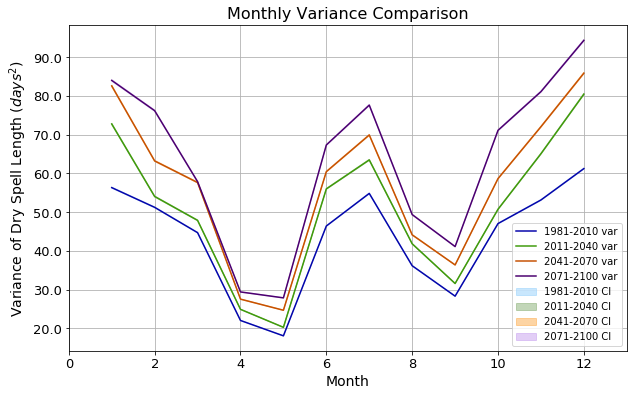

In [471]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D1BayStatsCIDF.index, D1BayStatsCIDF[BSCIHds[4]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010 var" )
ax11.fill( D1VarCI[:,0], D1VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 CI")
ax11.plot( P1BayStatsCIDF.index, P1BayStatsCIDF[BSCIHds[4]], color="xkcd:grass green", 
           linestyle="-", label="2011-2040 var" )
ax11.fill( P1VarCI[:,0], P1VarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="2011-2040 CI")
ax11.plot( P2BayStatsCIDF.index, P2BayStatsCIDF[BSCIHds[4]], color="xkcd:dark orange", 
           linestyle="-", label="2041-2070 var" )
ax11.fill( P2VarCI[:,0], P2VarCI[:,1], color="xkcd:light orange", alpha=0.5, 
           label="2041-2070 CI")
ax11.plot( P3BayStatsCIDF.index, P3BayStatsCIDF[BSCIHds[4]], color="xkcd:royal purple", 
           linestyle="-", label="2071-2100 var" )
ax11.fill( P3VarCI[:,0], P3VarCI[:,1], color="xkcd:lavender", alpha=0.5, 
           label="2071-2100 CI")
ax11.set_title('Monthly Variance Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Dry Spell Length ($days^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
#ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

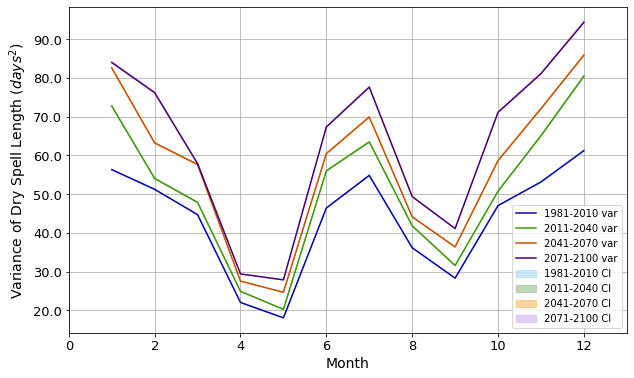

In [472]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D1BayStatsCIDF.index, D1BayStatsCIDF[BSCIHds[4]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010 var" )
ax11.fill( D1VarCI[:,0], D1VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 CI")
ax11.plot( P1BayStatsCIDF.index, P1BayStatsCIDF[BSCIHds[4]], color="xkcd:grass green", 
           linestyle="-", label="2011-2040 var" )
ax11.fill( P1VarCI[:,0], P1VarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="2011-2040 CI")
ax11.plot( P2BayStatsCIDF.index, P2BayStatsCIDF[BSCIHds[4]], color="xkcd:dark orange", 
           linestyle="-", label="2041-2070 var" )
ax11.fill( P2VarCI[:,0], P2VarCI[:,1], color="xkcd:light orange", alpha=0.5, 
           label="2041-2070 CI")
ax11.plot( P3BayStatsCIDF.index, P3BayStatsCIDF[BSCIHds[4]], color="xkcd:royal purple", 
           linestyle="-", label="2071-2100 var" )
ax11.fill( P3VarCI[:,0], P3VarCI[:,1], color="xkcd:lavender", alpha=0.5, 
           label="2071-2100 CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Dry Spell Length ($days^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
#ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )